In [2]:
technique = 'atacseq'
data_path = f"../data/ATACseq"
root_save_path = f"../saved_results/{technique}_new_trans_finetune_v2"
test_batches = ['s1d1', 's1d2', 's1d3', 's2d1', 's2d4', 's2d5', 's3d3', 's3d6', 's3d7',
       's3d10', 's4d1', 's4d8', 's4d9']
device = "cuda:0"

In [3]:
import scanpy as sc
adata_atac = sc.read_h5ad(f'{data_path}/atac_processed.h5ad')
adata_atac.X = adata_atac.X.toarray()
adata_atac.obs['label'] = list(adata_atac.obs['cell_type'])
adata_gex  = sc.read_h5ad(f'{data_path}/gex_processed.h5ad')
adata_gex.obs['label'] = list(adata_gex.obs['cell_type'])

def split_data(test_batch):
    adata_atac_train = adata_atac[adata_atac.obs['batch']!=test_batch]
    adata_atac_test  = adata_atac[adata_atac.obs['batch']==test_batch]

    adata_gex_train = adata_gex[adata_gex.obs['batch']!=test_batch]
    adata_gex_test  = adata_gex[adata_gex.obs['batch']==test_batch]

    return [adata_atac_train, adata_gex_train], [adata_atac_test, adata_gex_test]

##### Train

In [4]:
import sys
sys.path.append('..')
from src.interface import UnitedNet
from src.configs import *

In [4]:


for test_batch in test_batches:
    print(test_batch)
    adatas_train, adatas_test = split_data(test_batch)
    model = UnitedNet(f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
    model.train(adatas_train, verbose=True)
    model.finetune(adatas_train, verbose=True)
    model.transfer(adatas_train, adatas_transfer = adatas_test, verbose=True)
    print(model.evaluate(adatas_test))


s1d1
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.140333
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:14<11:14, 74.95s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.00400566 -0.00827048]
            [-0.00017142 -0.00016316]]
acc        0.9406902023006743
ari        0.8926885380773929
nmi        0.9129418387282449


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0344837
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:28<09:52, 74.05s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02690705  0.00920634]
            [-0.00021262 -0.00021937]]
acc        0.9851328837762793
ari        0.9653503529515268
nmi        0.9694585035693897


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0281456
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:42<08:38, 74.02s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03267341  0.01607986]
            [-0.00025516 -0.00025485]]
acc        0.9869892899642999
ari        0.9765493149314938
nmi        0.9756194923957963


Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.016933
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:56<07:24, 74.16s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03397659  0.01867066]
            [-0.0002547  -0.00025424]]
acc        0.9942721142403808
ari        0.9882061553450127
nmi        0.9864672131523283


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0120339
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:11<06:11, 74.26s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0323435   0.01649866]
            [-0.0002662  -0.00026402]]
acc        0.9941134470448235
ari        0.9860256866680033
nmi        0.9862314910508403


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00598151
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:25<04:56, 74.18s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03102604  0.0177834 ]
            [-0.00027659 -0.00027626]]
acc        0.9979531931773106
ari        0.994816293460688
nmi        0.9943982743589993
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:37<03:40, 73.54s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03761136 0.01501029]
            [0.02154063 0.02353999]]
acc        0.9929551765172551
ari        0.9855561507952009
nmi        0.9855700469108121
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:52<02:28, 74.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02809318 0.01714619]
            [0.04305409 0.04563964]]
acc        0.9976675922253074
ari        0.9951435783905157
nmi        0.9937844365966954
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:06<01:14, 74.07s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03175548 0.0080138 ]
            [0.04056322 0.04376373]]
acc        0.9828322094406982
ari        0.974553587945946
nmi        0.9707230237338867


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00444082
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:20<00:00, 74.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0344785  0.01967955]
            [0.04442216 0.04763021]]
acc        0.998524395081317
ari        0.9969482620867431
nmi        0.9959057737138343


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.199691
reconstruction_loss  0.328358
translation_loss     0.333642
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:14<11:10, 74.48s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04247984 0.02321215]
            [0.05983906 0.06386548]]
acc        0.9952717175723919
ari        0.9897419309535662
nmi        0.9890235141306377


Losses                  Value
-------------------  --------
contrastive_loss     0.135149
reconstruction_loss  0.325839
translation_loss     0.331951
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:29<09:57, 74.75s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04466855 0.02292096]
            [0.06623915 0.07063444]]
acc        0.997572391907973
ari        0.9949032115588612
nmi        0.9934298104698108


Losses                   Value
-------------------  ---------
contrastive_loss     0.0996433
reconstruction_loss  0.325257
translation_loss     0.331007
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:43<08:41, 74.45s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04472645 0.02340902]
            [0.06845469 0.07262989]]
acc        0.9987306624355414
ari        0.9972856347764463
nmi        0.9963319651610808
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:57<07:25, 74.19s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04656907 0.02341919]
            [0.06852194 0.07294831]]
acc        0.9989527965093217
ari        0.9976488951764515
nmi        0.9969048615705237


Losses                   Value
-------------------  ---------
contrastive_loss     0.0847312
reconstruction_loss  0.325218
translation_loss     0.33097
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:11<06:10, 74.02s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04563602 0.02289674]
            [0.06874363 0.07275646]]
acc        0.9988099960333201
ari        0.9976534309684699
nmi        0.9965911689590856


Losses                   Value
-------------------  ---------
contrastive_loss     0.0751401
reconstruction_loss  0.324448
translation_loss     0.330694
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:25<04:56, 74.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04806884 0.02460023]
            [0.06862143 0.07307325]]
acc        0.9991273304244348
ari        0.9981191470452069
nmi        0.9973460590113391


Losses                   Value
-------------------  ---------
contrastive_loss     0.0656059
reconstruction_loss  0.324739
translation_loss     0.330631
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:38<03:41, 73.94s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04695148 0.02394927]
            [0.06924078 0.07334461]]
acc        0.9995081316937723
ari        0.9988858598580991
nmi        0.9984575898581599


Losses                   Value
-------------------  ---------
contrastive_loss     0.0555997
reconstruction_loss  0.323985
translation_loss     0.330622
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:52<02:27, 73.83s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05025056 0.02407091]
            [0.06943339 0.07357995]]
acc        0.9994446648155494
ari        0.9987304625068805
nmi        0.9982665785113047


Losses                   Value
-------------------  ---------
contrastive_loss     0.0527062
reconstruction_loss  0.324056
translation_loss     0.330599
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:09<01:14, 74.71s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0492859  0.02426057]
            [0.06935994 0.07378278]]
acc        0.9995398651328837
ari        0.9990784014808375
nmi        0.9985596902142434
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:24<00:00, 74.42s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04260723 0.02369957]
            [0.06861341 0.07295318]]
acc        0.9994446648155494
ari        0.9989033025096885
nmi        0.9982414752185906


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00578217
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:13<23:14, 73.41s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03301495 0.01683785]
            [0.05870462 0.07224543]]
acc        0.9984133280444268
ari        0.9969555301666297
nmi        0.9955585972362946


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00173833
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:25<21:49, 72.76s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0392736  0.02296079]
            [0.06737437 0.07287178]]
acc        0.9996033320111067
ari        0.9991894944859722
nmi        0.9987614840727355
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:39<20:41, 73.05s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03591099 0.02014122]
            [0.06348386 0.07025452]]
acc        0.9989051963506546
ari        0.9980379157785918
nmi        0.9968920606441284
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:53<19:36, 73.50s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04019551 0.01465876]
            [0.06566719 0.07243724]]
acc        0.9984926616422055
ari        0.9975907808753879
nmi        0.9965275107299186
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:07<18:26, 73.76s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03414709 0.01985133]
            [0.06316321 0.07143697]]
acc        0.9994287980959936
ari        0.998802680054755
nmi        0.9984163998333149


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000804289
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:21<17:14, 73.86s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04517532 0.02226301]
            [0.06727724 0.0730519 ]]
acc        0.9997461324871083
ari        0.9994246233058305
nmi        0.9991602497958383


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000588782
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:34<15:57, 73.65s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04645369 0.02415904]
            [0.06894137 0.07347553]]
acc        0.9998095993653312
ari        0.9995888851407292
nmi        0.9993761703855482
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:48<14:43, 73.63s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03637085 0.01620128]
            [0.06448444 0.07307139]]
acc        0.9996033320111067
ari        0.9991195355060966
nmi        0.9987452344655909
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [11:02<13:30, 73.69s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01919664 0.00594388]
            [0.06081871 0.06743811]]
acc        0.9984291947639825
ari        0.9973300987112179
nmi        0.9955310513053688
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:16<12:17, 73.76s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03580761 0.01942998]
            [0.06625459 0.06980118]]
acc        0.9995239984133281
ari        0.9991780888430338
nmi        0.9985855329398732
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:29<11:03, 73.76s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04355143 0.0205412 ]
            [0.06671422 0.07315344]]
acc        0.9995081316937723
ari        0.9990844532296952
nmi        0.9985607865444142
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:44<09:51, 73.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03881895 0.01609   ]
            [0.06190223 0.07256838]]
acc        0.9987623958746529
ari        0.9975534583737817
nmi        0.9970203336093397
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [16:00<08:42, 74.70s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04532387 0.02344932]
            [0.06781634 0.07346247]]
acc        0.9995081316937723
ari        0.9989892055843848
nmi        0.9986754142269053


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000506298
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:16<07:29, 74.95s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04769175 0.02490495]
            [0.06931634 0.07399096]]
acc        0.9998095993653312
ari        0.999603390534415
nmi        0.9994068527402705


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000335039
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:32<06:16, 75.24s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0474675  0.0247596 ]
            [0.06906038 0.07406692]]
acc        0.9998889329631099
ari        0.9997846269709287
nmi        0.9996364019301202
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:47<05:00, 75.20s/it]



Metrics    Value
---------  -------------------------
r2         [[0.00411358 0.00334719]
            [0.04937304 0.06355086]]
acc        0.9931138437128124
ari        0.9883409142208159
nmi        0.9847539297441994
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [21:02<03:45, 75.24s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03404175 0.01646879]
            [0.06203246 0.06914545]]
acc        0.9994446648155494
ari        0.9989044828431105
nmi        0.9982959107187741
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [22:17<02:30, 75.19s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04313799 0.02325801]
            [0.06781656 0.07319629]]
acc        0.9997778659262198
ari        0.9994936869515629
nmi        0.9993038463961085
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [23:32<01:15, 75.09s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04807208 0.02533604]
            [0.06904164 0.07442709]]
acc        0.9998889329631099
ari        0.9997620764859908
nmi        0.9996604457225035
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [24:47<00:00, 74.37s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03715352 0.02321165]
            [0.06224605 0.07338939]]
acc        0.9997302657675525
ari        0.9995013915122163
nmi        0.9991495692880269


{'r2': array([[0.03046356, 0.0221504 ],
       [0.06631869, 0.07555739]]), 'acc': 0.8165167095115681, 'ari': 0.7396375475803079, 'nmi': 0.8071819000610417}
s1d2
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.161227
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:13<11:02, 73.63s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.01531382 -0.01048406]
            [-0.0001784  -0.0001784 ]]
acc        0.9467436689116767
ari        0.913082828540329
nmi        0.9164714459696023


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0427689
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:25<09:41, 72.66s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03231718  0.01080229]
            [-0.00021673 -0.00021667]]
acc        0.9790750131980994
ari        0.9561657554287236
nmi        0.9599386737631173


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0155266
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:38<08:28, 72.67s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03733076 0.01506233]
            [0.01660421 0.01892542]]
acc        0.9944328016765586
ari        0.9879113054322276
nmi        0.9863706718040074


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0126628
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:51<07:16, 72.69s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03501814 0.01572775]
            [0.01759821 0.01873471]]
acc        0.996352525236366
ari        0.9926552065443618
nmi        0.9901954554914802


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00522228
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:03<06:03, 72.69s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03976382 0.02023856]
            [0.01753724 0.01929515]]
acc        0.9980642787438608
ari        0.9953499385561034
nmi        0.9946673944226851
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:17<04:52, 73.12s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03337555 0.01777608]
            [0.01686282 0.01865837]]
acc        0.9938888800012798
ari        0.9885393871866186
nmi        0.9860287322664232
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:31<03:39, 73.27s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03701533 0.02027394]
            [0.02174369 0.02535661]]
acc        0.9940488569645971
ari        0.9891381253650036
nmi        0.9879182020684358
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:44<02:26, 73.39s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03957383 0.01939826]
            [0.04238481 0.04515188]]
acc        0.9963205298437025
ari        0.9940047704984567
nmi        0.9916433905855642
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:56<01:12, 72.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03244328 0.01769564]
            [0.04443963 0.04614428]]
acc        0.9960965620950583
ari        0.9911809278351476
nmi        0.991141348364619


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00220982
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:09<00:00, 72.95s/it]



Metrics    Value
---------  -------------------------
r2         [[0.00363899 0.00981867]
            [0.04436224 0.04964409]]
acc        0.9993440944503992
ari        0.9983499362871843
nmi        0.9980151832905949


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.194256
reconstruction_loss  0.331594
translation_loss     0.336403
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:13<11:01, 73.55s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04406633 0.02288032]
            [0.05359718 0.05553418]]
acc        0.9951526980114863
ari        0.9897310635387538
nmi        0.9884911165861247


Losses                  Value
-------------------  --------
contrastive_loss     0.119976
reconstruction_loss  0.330893
translation_loss     0.336131
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:26<09:45, 73.22s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04388953 0.02176082]
            [0.05568718 0.05797783]]
acc        0.9983202418851685
ari        0.9958434664980286
nmi        0.9950935799536145


Losses                  Value
-------------------  --------
contrastive_loss     0.113382
reconstruction_loss  0.330748
translation_loss     0.335712
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:38<08:28, 72.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04487448 0.02327171]
            [0.05596224 0.05806784]]
acc        0.9987521796861252
ari        0.9968139352978868
nmi        0.9963537847172715


Losses                   Value
-------------------  ---------
contrastive_loss     0.0967786
reconstruction_loss  0.329715
translation_loss     0.334697
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:50<07:14, 72.39s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04460807 0.02232321]
            [0.05901353 0.0613145 ]]
acc        0.998880161256779
ari        0.9975439130671389
nmi        0.9966786811766436


Losses                   Value
-------------------  ---------
contrastive_loss     0.0811266
reconstruction_loss  0.329616
translation_loss     0.334411
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:02<06:01, 72.24s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04420528 0.02390634]
            [0.05967294 0.06152519]]
acc        0.9992801036650723
ari        0.9982699573918552
nmi        0.9977741122464698


Losses                   Value
-------------------  ---------
contrastive_loss     0.0677099
reconstruction_loss  0.32799
translation_loss     0.333028
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:13<04:47, 71.88s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04599376 0.02378407]
            [0.06356006 0.06558521]]
acc        0.9994240829320578
ari        0.9986213340270559
nmi        0.9982478521535594


Losses                  Value
-------------------  --------
contrastive_loss     0.09796
reconstruction_loss  0.327645
translation_loss     0.332877
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:24<03:34, 71.53s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04558452 0.02328014]
            [0.0642246  0.06687268]]
acc        0.9983362395815003
ari        0.995688138054974
nmi        0.9954959775535547


Losses                   Value
-------------------  ---------
contrastive_loss     0.0665135
reconstruction_loss  0.327846
translation_loss     0.33282
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:36<02:23, 71.72s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04613579 0.02408397]
            [0.06414345 0.06638931]]
acc        0.9993120990577357
ari        0.9983716649965343
nmi        0.9979022668232026


Losses                   Value
-------------------  ---------
contrastive_loss     0.0614561
reconstruction_loss  0.32737
translation_loss     0.332571
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:48<01:11, 71.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04737381 0.02473644]
            [0.06447733 0.06691414]]
acc        0.9995520645027116
ari        0.9989261743039503
nmi        0.9985909282924161
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:01<00:00, 72.16s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04580206 0.02355656]
            [0.06438411 0.06651579]]
acc        0.999584059895375
ari        0.9990233975364587
nmi        0.9987019449206181


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00958783
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:12<22:56, 72.45s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03299668 0.01587386]
            [0.05655298 0.06483343]]
acc        0.9986241981154713
ari        0.9979016209261479
nmi        0.9962570158256451


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00111495
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:23<21:33, 71.88s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04511678 0.02231729]
            [0.06254763 0.06631568]]
acc        0.999648050680702
ari        0.999157312807743
nmi        0.998897539920539
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:34<20:15, 71.50s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03741394 0.01615595]
            [0.06091901 0.0663547 ]]
acc        0.9993440944503992
ari        0.9989785275008101
nmi        0.9981112497652787
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:45<18:58, 71.15s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03322658 0.01070922]
            [0.06096968 0.06563394]]
acc        0.9989761474347694
ari        0.9976583779155831
nmi        0.9973825382753252
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [05:57<17:50, 71.34s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02471838 0.0062117 ]
            [0.05871956 0.06481117]]
acc        0.9991681197907502
ari        0.9985652823650046
nmi        0.9974775014103616
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:09<16:42, 71.62s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02496788 0.0192572 ]
            [0.06066785 0.06560844]]
acc        0.9992321105760771
ari        0.9986244710832841
nmi        0.9978122041244031


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0006301
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:20<15:26, 71.28s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04120446 0.02232911]
            [0.06050505 0.05217447]]
acc        0.9998080276440192
ari        0.9995462709968452
nmi        0.9993652855070085
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:31<14:14, 71.19s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02921113 0.00423713]
            [0.05556039 0.05265003]]
acc        0.9997920299476876
ari        0.9995634467176618
nmi        0.9993322782093225
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [10:43<13:08, 71.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04371838 0.01641537]
            [0.06137172 0.06832263]]
acc        0.9988961589531108
ari        0.9987385590462342
nmi        0.9974588359101195
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [11:55<11:56, 71.61s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04035827 0.02031398]
            [0.06326734 0.06965447]]
acc        0.9994560783247213
ari        0.9990880258433115
nmi        0.9985875545688111
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:08<10:48, 72.03s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03339817 0.02220602]
            [0.06258047 0.06834989]]
acc        0.9998080276440192
ari        0.9995589066348407
nmi        0.9993710282433343
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:21<09:40, 72.54s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04072446 0.02093531]
            [0.06599452 0.06731142]]
acc        0.9978563086915484
ari        0.9971153089124521
nmi        0.9962313892976015
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [15:34<08:27, 72.45s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03482564 0.02062161]
            [0.06434711 0.07234561]]
acc        0.9988321681677839
ari        0.9984824002815201
nmi        0.9970455762834798
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [16:44<07:11, 71.87s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04425728 0.0236029 ]
            [0.06708992 0.07070549]]
acc        0.9996800460733655
ari        0.9994042820571373
nmi        0.998953375238853
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [17:55<05:57, 71.42s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03255408 0.01015425]
            [0.06020396 0.07042539]]
acc        0.9993280967540674
ari        0.9986641790837063
nmi        0.9981685799421225


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000627322
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:05<04:44, 71.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0503142  0.0219382 ]
            [0.06931526 0.0748229 ]]
acc        0.9998080276440192
ari        0.9996183800864622
nmi        0.9993674890114835
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:16<03:33, 71.12s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03700492 0.02186447]
            [0.06282358 0.07363964]]
acc        0.9997440368586924
ari        0.9995713363596763
nmi        0.99921352245021
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [21:27<02:22, 71.12s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04138594 0.02321888]
            [0.0665213  0.07294265]]
acc        0.9998080276440192
ari        0.9996991379368326
nmi        0.9993856574051294
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [22:38<01:10, 70.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02948496 0.01740428]
            [0.06090123 0.06941817]]
acc        0.9990561359164281
ari        0.9987474706166114
nmi        0.9976410328473343
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d2/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:48<00:00, 71.41s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02408796 0.02297499]
            [0.06721526 0.07399378]]
acc        0.9997920299476876
ari        0.9995700176002668
nmi        0.9992959678718543


{'r2': array([[-0.00639906,  0.01706149],
       [ 0.04831704,  0.05525342]]), 'acc': 0.6510385756676558, 'ari': 0.6259161373991036, 'nmi': 0.7220317714410281}
s1d3
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.141741
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:12<10:56, 72.93s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.00408629 -0.00681538]
            [-0.00016724 -0.00016661]]
acc        0.9388179159612129
ari        0.8805507202709418
nmi        0.9107070195340016


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0365628
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:25<09:42, 72.81s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0297717   0.01411382]
            [-0.00020431 -0.00020133]]
acc        0.9851623826381407
ari        0.9675395251258316
nmi        0.9686646653779805


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0285666
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:40<08:36, 73.75s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03250685  0.01506967]
            [-0.00022814 -0.00022841]]
acc        0.986024318916423
ari        0.9718770949831826
nmi        0.9719538028541009


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0205409
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:55<07:24, 74.05s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02485064  0.0165398 ]
            [-0.00023535 -0.00022908]]
acc        0.99245805756503
ari        0.985619371005863
nmi        0.983105708011168


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00787928
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:09<06:10, 74.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02817995 0.01976298]
            [0.01562465 0.01862541]]
acc        0.9970909650607973
ari        0.9937357482603141
nmi        0.9923910660538556


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00627322
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:23<04:57, 74.28s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03348684 0.02083235]
            [0.02602436 0.02909526]]
acc        0.9964599045713406
ari        0.9908969047857875
nmi        0.992112777602959
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:38<03:42, 74.29s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03821431 0.01841801]
            [0.03620288 0.04003716]]
acc        0.993951054332769
ari        0.9903307366803057
nmi        0.9865012915624641


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00469546
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:51<02:28, 74.09s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03495721 0.01706011]
            [0.04809541 0.05483794]]
acc        0.9981837771279052
ari        0.9959196074069794
nmi        0.994882003622857
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:05<01:13, 74.00s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03027509 0.01202023]
            [0.05394286 0.05772773]]
acc        0.9962136370632599
ari        0.993815708304465
nmi        0.99096015665793


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00180218
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:20<00:00, 74.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0418356  0.02146539]
            [0.05782912 0.06219612]]
acc        0.9993535477912883
ari        0.9985282027740194
nmi        0.9980609834339497


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.16502
reconstruction_loss  0.328665
translation_loss     0.333596
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:15<11:21, 75.78s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04323516 0.02233294]
            [0.06462332 0.06734805]]
acc        0.9974141911651532
ari        0.9943368849348961
nmi        0.9929530076551584


Losses                  Value
-------------------  --------
contrastive_loss     0.51614
reconstruction_loss  0.327951
translation_loss     0.333095
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:30<10:01, 75.20s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0447308  0.02363659]
            [0.06591091 0.068938  ]]
acc        0.9469755271663844
ari        0.908753140931519
nmi        0.9588939339238277


Losses                  Value
-------------------  --------
contrastive_loss     0.104884
reconstruction_loss  0.327404
translation_loss     0.332605
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:44<08:42, 74.67s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0451285  0.024076  ]
            [0.0670811  0.07045568]]
acc        0.9984146529167308
ari        0.9966316685312729
nmi        0.9954550004101136


Losses                   Value
-------------------  ---------
contrastive_loss     0.0818502
reconstruction_loss  0.326821
translation_loss     0.332295
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:59<07:27, 74.58s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04742051 0.02377484]
            [0.06807298 0.07116672]]
acc        0.9991996305987378
ari        0.9981063704279868
nmi        0.9975436216128875


Losses                   Value
-------------------  ---------
contrastive_loss     0.0706716
reconstruction_loss  0.326228
translation_loss     0.331977
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:13<06:12, 74.42s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0494086  0.02447574]
            [0.0689011  0.07190967]]
acc        0.9993227643527782
ari        0.9982574528941975
nmi        0.9979139351991915


Losses                   Value
-------------------  ---------
contrastive_loss     0.0696023
reconstruction_loss  0.325985
translation_loss     0.331898
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:26<04:56, 74.15s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04961359 0.02456916]
            [0.06880431 0.07223295]]
acc        0.9995536401416039
ari        0.9988662784052289
nmi        0.9985807672243858


Losses                   Value
-------------------  ---------
contrastive_loss     0.0765058
reconstruction_loss  0.326407
translation_loss     0.331515
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:40<03:41, 73.87s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04523951 0.02451498]
            [0.06961102 0.07321176]]
acc        0.9993073726335232
ari        0.9983356935565516
nmi        0.9978132163159


Losses                   Value
-------------------  ---------
contrastive_loss     0.0793116
reconstruction_loss  0.325887
translation_loss     0.331466
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:53<02:27, 73.73s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0469105  0.02471941]
            [0.06967385 0.07363944]]
acc        0.9991072802832076
ari        0.9981568405128686
nmi        0.9972506934863263
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:06<01:13, 73.43s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0476832  0.0232937 ]
            [0.06973824 0.07414712]]
acc        0.9988456210558719
ari        0.9972491668801562
nmi        0.9965560524531544


Losses                   Value
-------------------  ---------
contrastive_loss     0.0563212
reconstruction_loss  0.325143
translation_loss     0.331422
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:20<00:00, 74.03s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04914985 0.02423023]
            [0.07007293 0.07396085]]
acc        0.9995382484223487
ari        0.9989589166497294
nmi        0.9985446256669654


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00994074
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:14<23:27, 74.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04076193 0.01490122]
            [0.0625566  0.07147474]]
acc        0.997368016007388
ari        0.9953536459565724
nmi        0.9934836097968679


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00311054
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:28<22:15, 74.19s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03316586 0.02027457]
            [0.06502342 0.0718788 ]]
acc        0.9993381560720332
ari        0.9989873818870969
nmi        0.9980761919426425


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00173585
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:43<21:08, 74.63s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0380587  0.02115303]
            [0.06678598 0.07345868]]
acc        0.9995228567030937
ari        0.9989750562378225
nmi        0.9985685336965017


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000870844
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:58<19:54, 74.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04218287 0.02238097]
            [0.06839615 0.07434674]]
acc        0.9997537324919193
ari        0.9994270752299614
nmi        0.9991762725268585
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:12<18:40, 74.67s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04300962 0.02384002]
            [0.07057135 0.07657482]]
acc        0.9986301369863013
ari        0.9980587486463801
nmi        0.9973293034932232


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000429712
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:28<17:29, 74.96s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04879897 0.02482458]
            [0.07193661 0.07691853]]
acc        0.9997845159304294
ari        0.9995159753067977
nmi        0.9993227853607156
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:43<16:15, 75.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03105628 0.01542101]
            [0.05452686 0.06993843]]
acc        0.9907187932892104
ari        0.9791022310073308
nmi        0.9787419625476588
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:58<14:58, 74.86s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03277621 0.01960293]
            [0.06054268 0.07370315]]
acc        0.9969524395875019
ari        0.9940313756059445
nmi        0.9924918345456585
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [11:12<13:41, 74.70s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03763498 0.02227529]
            [0.07025602 0.07600563]]
acc        0.9996767738956441
ari        0.9992677347328709
nmi        0.9989282170432738
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:26<12:25, 74.51s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04011573 0.02043801]
            [0.0689928  0.07703023]]
acc        0.9994458981068185
ari        0.9993760538936111
nmi        0.9984707732865544
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:40<11:09, 74.41s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04260002 0.02122537]
            [0.06804475 0.07657931]]
acc        0.9995844235801139
ari        0.9990649719372937
nmi        0.9988549561553846


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000368256
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:55<09:55, 74.38s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0482581  0.02489828]
            [0.07194988 0.07735493]]
acc        0.9998614745267046
ari        0.9997065981369696
nmi        0.9995355717044812


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000174573
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [16:09<08:39, 74.29s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05013008 0.02529492]
            [0.07263016 0.07821592]]
acc        0.9998922579652147
ari        0.9997356451738862
nmi        0.9996390999171542


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00012821
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:23<07:25, 74.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05097126 0.02554576]
            [0.07300687 0.07857629]]
acc        0.9999384331229798
ari        0.9998708195072854
nmi        0.999799620968045
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:37<06:11, 74.33s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04497915 0.0216354 ]
            [0.06682454 0.07563958]]
acc        0.9993073726335232
ari        0.9991791447587994
nmi        0.9983771277372329
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:52<04:57, 74.31s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.01594787 -0.04128253]
            [ 0.05635451  0.06444943]]
acc        0.9981837771279052
ari        0.9977578674566806
nmi        0.9951432210564042
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [21:06<03:43, 74.37s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03703468 0.02356679]
            [0.07032727 0.07640462]]
acc        0.9997229490534093
ari        0.999409429068669
nmi        0.9991137269870707
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [22:21<02:29, 74.58s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0501799  0.02430629]
            [0.07258366 0.07833224]]
acc        0.9998922579652147
ari        0.9997359945556948
nmi        0.9996320579515692
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [23:36<01:14, 74.80s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05069546 0.02524421]
            [0.07327883 0.07909931]]
acc        0.9999230414037248
ari        0.9997984061312012
nmi        0.9997253017511242
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d3/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [24:50<00:00, 74.55s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0498559  0.02391166]
            [0.07312693 0.08021409]]
acc        0.9999076496844698
ari        0.9997466021846555
nmi        0.9996650501475893


{'r2': array([[0.04005702, 0.02276219],
       [0.05098852, 0.06657846]]), 'acc': 0.7826594998831503, 'ari': 0.7099424594506093, 'nmi': 0.7849381599169905}
s2d1
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.189686
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:13<10:57, 73.09s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.00097035 -0.00313198]
            [-0.00019319 -0.00022816]]
acc        0.903596856786972
ari        0.8493688385903806
nmi        0.8817264945924078


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0990869
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:25<09:43, 72.98s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02399425  0.00938204]
            [-0.000233   -0.00022264]]
acc        0.9495148318442541
ari        0.9107890227802908
nmi        0.933062461417052


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0504395
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:38<08:29, 72.82s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.01591495  0.01394961]
            [-0.00025887 -0.00025155]]
acc        0.9785787879253871
ari        0.9519523327600038
nmi        0.9604551492023077


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0268333
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:50<07:15, 72.51s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03006839  0.01891141]
            [-0.00027746 -0.00027779]]
acc        0.9893585938581249
ari        0.9768902799658767
nmi        0.9800881574827596


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0206937
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:01<05:59, 71.99s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02587613  0.01255267]
            [-0.00029094 -0.00029576]]
acc        0.991219302157499
ari        0.9784112936954233
nmi        0.9803363719282694


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0145165
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:13<04:47, 71.78s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0341901   0.02016278]
            [-0.00026469 -0.00026277]]
acc        0.9925264112934229
ari        0.9807776395215582
nmi        0.9830199854977042
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:24<03:35, 71.80s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03126199  0.01244476]
            [ 0.01507129 -0.00184215]]
acc        0.9915422350028449
ari        0.9800188395672113
nmi        0.983300030586864


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0132547
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:37<02:23, 71.89s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02673458 0.01275724]
            [0.03404546 0.04067046]]
acc        0.9931415214750342
ari        0.9819495822643487
nmi        0.9842036484888262


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00826113
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:49<01:11, 71.99s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0372447  0.02036335]
            [0.04507146 0.0473197 ]]
acc        0.9952328960925125
ari        0.9868899002743096
nmi        0.988867530316678
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:01<00:00, 72.19s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04099679 0.02240346]
            [0.05276171 0.05506233]]
acc        0.9943409863291762
ari        0.9863465630188145
nmi        0.9868686356888954


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.225663
reconstruction_loss  0.324107
translation_loss     0.328904
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:12<10:55, 72.79s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04044582 0.02267167]
            [0.06610076 0.07039315]]
acc        0.9933875655476787
ari        0.9826766786736133
nmi        0.9843935071730415
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:27<09:50, 73.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04089623 0.02295707]
            [0.06534505 0.0709277 ]]
acc        0.9573267311507174
ari        0.9275794231738218
nmi        0.958307458817424


Losses                  Value
-------------------  --------
contrastive_loss     0.282198
reconstruction_loss  0.323566
translation_loss     0.328898
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:42<08:40, 74.32s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04097127 0.02390458]
            [0.06559142 0.07146268]]
acc        0.9922957449753187
ari        0.9806784693966987
nmi        0.9836026040373367
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:54<07:21, 73.54s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03647208 0.02330957]
            [0.05875009 0.06905801]]
acc        0.9763643912715865
ari        0.9459604695240635
nmi        0.9611793811829683
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:05<06:03, 72.67s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03881514 0.01922155]
            [0.06707596 0.07150844]]
acc        0.9963400944194128
ari        0.9901939065300084
nmi        0.9912808721685568


Losses                  Value
-------------------  --------
contrastive_loss     0.203468
reconstruction_loss  0.32352
translation_loss     0.328568
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:17<04:49, 72.44s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04134588 0.02340242]
            [0.06681231 0.07210544]]
acc        0.9959556505559058
ari        0.9890626667749686
nmi        0.989838421856317
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:29<03:36, 72.31s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04369013 0.02313772]
            [0.06700476 0.07148863]]
acc        0.9937566316566455
ari        0.9843356010917351
nmi        0.9861931156996412


Losses                  Value
-------------------  --------
contrastive_loss     0.149626
reconstruction_loss  0.323615
translation_loss     0.328239
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:41<02:24, 72.14s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04185817 0.02406293]
            [0.06781777 0.07183595]]
acc        0.9939104092020483
ari        0.9828957179488282
nmi        0.9866602359781858


Losses                   Value
-------------------  ---------
contrastive_loss     0.0971889
reconstruction_loss  0.323143
translation_loss     0.328188
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:54<01:12, 72.46s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04314299 0.02360081]
            [0.06826819 0.07241094]]
acc        0.9968936935828631
ari        0.9919824425030803
nmi        0.9916910953714235
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:08<00:00, 72.83s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04226704 0.02348596]
            [0.06809591 0.07193918]]
acc        0.9973550262190715
ari        0.9927072617366296
nmi        0.9928938513855197


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0363265
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:12<22:54, 72.33s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03043396 -0.0372442 ]
            [ 0.05615301  0.05728636]]
acc        0.9939257869565886
ari        0.9891530131503834
nmi        0.9867645137992587


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00884912
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:24<21:40, 72.26s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01260609 0.00029743]
            [0.0592105  0.06856792]]
acc        0.9971397376555076
ari        0.9932753391730383
nmi        0.9924900957309296


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00855513
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:36<20:27, 72.23s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03061801 0.01797335]
            [0.0643821  0.06923709]]
acc        0.9952175183379723
ari        0.9889887168347044
nmi        0.9893077374094867


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00615193
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:48<19:14, 72.14s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03564716 0.02097494]
            [0.06512088 0.07160458]]
acc        0.9984929800550524
ari        0.996233386278628
nmi        0.995745595269868
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:01<18:04, 72.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01577465 0.01254939]
            [0.05730692 0.06860453]]
acc        0.9981239139460856
ari        0.9958796783236857
nmi        0.9948843740856482
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:14<16:55, 72.53s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02634339 0.01415806]
            [0.0622272  0.07113519]]
acc        0.9953866736379154
ari        0.9901251729152398
nmi        0.9886812867937743


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00350411
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:28<15:50, 73.14s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.01891837  0.01337081]
            [ 0.06166456  0.06923588]]
acc        0.9987697796367775
ari        0.9970600503509734
nmi        0.9965494083542525
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:43<14:44, 73.71s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03941552 0.02431013]
            [0.06631332 0.07164533]]
acc        0.998800535145858
ari        0.9970827033400727
nmi        0.9963881759304319
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [10:58<13:33, 73.99s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03777355 0.01717875]
            [0.06560572 0.06940352]]
acc        0.9989389349367206
ari        0.9975954542085581
nmi        0.996962846495048
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:13<12:22, 74.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03215071 0.01706262]
            [0.0598801  0.06489918]]
acc        0.9986006243368344
ari        0.9965341342736742
nmi        0.9958452045627278
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:28<11:10, 74.54s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02057557 0.02377416]
            [0.06564177 0.07192268]]
acc        0.9987390241276969
ari        0.9971350635406987
nmi        0.9963565722635752


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00230721
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:43<09:57, 74.66s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0444507  0.02457457]
            [0.06644016 0.07254637]]
acc        0.9991542235002845
ari        0.9978897261177611
nmi        0.9974668196585345
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [15:57<08:41, 74.47s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02354056 0.0131273 ]
            [0.0398094  0.06524663]]
acc        0.9981085361915453
ari        0.995853509326116
nmi        0.9948920238834065
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:08<07:21, 73.56s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03545202 0.02265693]
            [0.06743812 0.07220465]]
acc        0.9984314690368913
ari        0.9965471490146933
nmi        0.995891809193567
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:19<06:03, 72.78s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03424432 0.02116428]
            [0.0679305  0.07044374]]
acc        0.9989389349367206
ari        0.9973407778928446
nmi        0.9969944861503092
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:29<04:47, 71.96s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0272364  0.01687166]
            [0.06603312 0.06988831]]
acc        0.9987851573913177
ari        0.997080459011998
nmi        0.9964679232526082
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:40<03:34, 71.53s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03784533 0.02014437]
            [0.06617112 0.07140883]]
acc        0.9988774239185594
ari        0.9974396530040598
nmi        0.9966635506178323
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [21:52<02:23, 71.63s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02281408 0.02238866]
            [0.06509158 0.07203249]]
acc        0.9989696904458011
ari        0.9975514124660263
nmi        0.9969106236322733
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [23:04<01:11, 71.82s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03094664 0.01808243]
            [0.06327523 0.07122323]]
acc        0.9983392025096496
ari        0.9960876832327629
nmi        0.9951282923002556
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d1/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [24:16<00:00, 72.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04244676 0.02243183]
            [0.06528494 0.07222432]]
acc        0.998800535145858
ari        0.997081927659541
nmi        0.9964983877746


{'r2': array([[0.031178  , 0.0047448 ],
       [0.06648346, 0.07530602]]), 'acc': 0.8672985781990521, 'ari': 0.8555431852914315, 'nmi': 0.8158685702952166}
s2d4
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.129999
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:09<10:23, 69.27s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.0042833  -0.01691322]
            [-0.00017436 -0.00024236]]
acc        0.9481136558015775
ari        0.9035247057952365
nmi        0.9146195099442241


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0365534
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:20<09:22, 70.27s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03056207  0.01336344]
            [-0.00022706 -0.00022735]]
acc        0.9831005099939815
ari        0.9636715392410685
nmi        0.9658174467299795


Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.018487
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:32<08:18, 71.18s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03487177  0.01726136]
            [-0.000143   -0.00025129]]
acc        0.9924767968576769
ari        0.9838815120528008
nmi        0.98279583757401
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:42<07:04, 70.68s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01841716 0.01121247]
            [0.01351611 0.01656834]]
acc        0.9888814976717666
ari        0.9812469924290613
nmi        0.9775528149759639


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00794889
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:52<05:52, 70.51s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03516429 0.01856741]
            [0.01741484 0.01903896]]
acc        0.9968323355190218
ari        0.9933633609751343
nmi        0.9922344422610178
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:02<04:41, 70.42s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03346784 0.0190873 ]
            [0.01654443 0.01924523]]
acc        0.994773353606386
ari        0.9924021055266612
nmi        0.988779636053051
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:12<03:30, 70.31s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03571225 0.01845298]
            [0.01814943 0.0197543 ]]
acc        0.9954860781146061
ari        0.9904740815615453
nmi        0.9894147445513735
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:24<02:21, 70.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04003189 0.02052488]
            [0.01924111 0.02011064]]
acc        0.9953752098577718
ari        0.9924640177330627
nmi        0.9898441169631017


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00308795
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:35<01:10, 70.82s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03974021 0.02034086]
            [0.03978595 0.04341282]]
acc        0.9988121258196332
ari        0.9975272743329207
nmi        0.9967260047578616
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:46<00:00, 70.62s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03351974 -0.00149373]
            [ 0.04275886  0.04690636]]
acc        0.9964838924261142
ari        0.9934432849372188
nmi        0.9907602193384595


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.179283
reconstruction_loss  0.325908
translation_loss     0.330804
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:11<10:46, 71.83s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03926806 0.02136594]
            [0.06636422 0.07089589]]
acc        0.9967531439069973
ari        0.9927046494638627
nmi        0.991421078151151


Losses                  Value
-------------------  --------
contrastive_loss     0.136809
reconstruction_loss  0.325199
translation_loss     0.329999
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:23<09:33, 71.74s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04063653 0.02285939]
            [0.06876968 0.07263741]]
acc        0.9978618264753397
ari        0.995213213897428
nmi        0.9939201096847392


Losses                  Value
-------------------  --------
contrastive_loss     0.102181
reconstruction_loss  0.324663
translation_loss     0.329947
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:33<08:16, 70.98s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04188254 0.02377688]
            [0.06853874 0.07307544]]
acc        0.9983052995026767
ari        0.9962618208331959
nmi        0.9955089335376764


Losses                   Value
-------------------  ---------
contrastive_loss     0.0919541
reconstruction_loss  0.324556
translation_loss     0.329726
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:44<07:04, 70.82s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04233504 0.02436705]
            [0.06893504 0.07343568]]
acc        0.9984795210491305
ari        0.9972854472077646
nmi        0.9960589891237998
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:55<05:55, 71.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04274001 0.02368671]
            [0.06889192 0.07308009]]
acc        0.9992872754917799
ari        0.9983938219262587
nmi        0.9977752331838378


Losses                   Value
-------------------  ---------
contrastive_loss     0.0825366
reconstruction_loss  0.324982
translation_loss     0.329646
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:08<04:46, 71.55s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04054393 0.02434747]
            [0.06957143 0.07335164]]
acc        0.9991764072349457
ari        0.9979928415853597
nmi        0.9974676677636176


Losses                   Value
-------------------  ---------
contrastive_loss     0.0995503
reconstruction_loss  0.324044
translation_loss     0.32931
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:18<03:33, 71.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04219959 0.02253715]
            [0.0710319  0.07513448]]
acc        0.9982102695682473
ari        0.9956681059617157
nmi        0.994987997082152


Losses                   Value
-------------------  ---------
contrastive_loss     0.0646813
reconstruction_loss  0.323739
translation_loss     0.329008
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:28<02:21, 70.70s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0435244  0.0241958 ]
            [0.07115122 0.07523674]]
acc        0.9992080838797555
ari        0.9981041622096618
nmi        0.997624170496907


Losses                  Value
-------------------  --------
contrastive_loss     0.053927
reconstruction_loss  0.323162
translation_loss     0.328888
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:37<01:10, 70.20s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04447793 0.02461399]
            [0.07161711 0.07637981]]
acc        0.9995248503278533
ari        0.9987368308651505
nmi        0.998551959696872


Losses                   Value
-------------------  ---------
contrastive_loss     0.0479245
reconstruction_loss  0.322549
translation_loss     0.328588
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:46<00:00, 70.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04626673 0.02443907]
            [0.07268235 0.07750029]]
acc        0.9996832335519021
ari        0.999137510315209
nmi        0.998996469737532


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00178085
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:09<21:51, 69.05s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03210093 0.017814  ]
            [0.06205259 0.0761997 ]]
acc        0.9993981437486141
ari        0.9987392111059107
nmi        0.998155571160074
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:19<20:53, 69.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03549956 0.02024445]
            [0.06389747 0.07580143]]
acc        0.9965789223605436
ari        0.9945998770429398
nmi        0.9914595517229177
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:27<19:35, 69.12s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03499037 0.01787728]
            [0.06841908 0.07649496]]
acc        0.9995565269726631
ari        0.9989457664385165
nmi        0.9985645259354818


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00108102
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:37<18:30, 69.39s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04798903 0.02425315]
            [0.07322158 0.07949094]]
acc        0.9996673952294973
ari        0.9992021362530399
nmi        0.9989581283864328
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [05:47<17:23, 69.57s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03319604 0.01993607]
            [0.06911915 0.07875412]]
acc        0.9993189521365897
ari        0.9987495503442485
nmi        0.9981220076186916


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000692179
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [06:58<16:20, 70.06s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04801994 0.02517917]
            [0.07408427 0.08038211]]
acc        0.9997624251639267
ari        0.9993835226289052
nmi        0.999236834905745
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:07<15:08, 69.88s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0269214  0.0224507 ]
            [0.07277819 0.07785067]]
acc        0.9993189521365897
ari        0.9991338911049986
nmi        0.9982861824735695
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:17<13:57, 69.75s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.01346608 -0.00812756]
            [ 0.04749079  0.06986392]]
acc        0.9981310779562229
ari        0.9964882260627468
nmi        0.9949537591120796
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [10:27<12:48, 69.87s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03219613 0.02265042]
            [0.07206139 0.07964816]]
acc        0.9996832335519021
ari        0.9991797723949047
nmi        0.9989828677086335


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000412139
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [11:37<11:39, 69.96s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0485539  0.02523858]
            [0.07546477 0.08053451]]
acc        0.9997782634863315
ari        0.9993832769245066
nmi        0.999330086777931


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000264134
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [12:46<10:27, 69.77s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04899338 0.02273582]
            [0.07568986 0.08053806]]
acc        0.9998732934207609
ari        0.9996233047637237
nmi        0.9996018913588468


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000237027
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [13:56<09:17, 69.70s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04874304 0.02265671]
            [0.07568674 0.08106079]]
acc        0.9998732934207609
ari        0.9995948996055948
nmi        0.9995884965770572


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000154213
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [15:06<08:08, 69.77s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04989625 0.02546019]
            [0.07593166 0.0811131 ]]
acc        0.9999366467103804
ari        0.999785016831324
nmi        0.9997927397432036
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [16:15<06:57, 69.57s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04688069 0.020166  ]
            [0.07579713 0.08060382]]
acc        0.9998891317431657
ari        0.9996982080806263
nmi        0.999629770836865
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [17:24<05:47, 69.43s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02682118 0.02142955]
            [0.06209223 0.07599622]]
acc        0.9988279641420381
ari        0.9981085940096384
nmi        0.9967279582473356
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [18:34<04:38, 69.59s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02483173 -0.00816296]
            [ 0.06873367  0.07406403]]
acc        0.9995882036174728
ari        0.9993349283466565
nmi        0.998701183485937
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [19:44<03:29, 69.83s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0378743  0.01862121]
            [0.07336621 0.07848172]]
acc        0.9998257784535463
ari        0.9996213639097188
nmi        0.9994398023116612
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [20:56<02:20, 70.26s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04816875 0.01911734]
            [0.07531511 0.08032995]]
acc        0.9998891317431657
ari        0.9997302058256338
nmi        0.9996249347530735
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [22:06<01:10, 70.35s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05064181 0.0236168 ]
            [0.0754574  0.0810827 ]]
acc        0.9998732934207609
ari        0.9997697062242957
nmi        0.9995902625735263
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d4/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:16<00:00, 69.84s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04908049 0.02249671]
            [0.07613302 0.08100192]]
acc        0.9999524850327853
ari        0.9998563921092884
nmi        0.9998342780959653


{'r2': array([[0.05217365, 0.02011032],
       [0.06014629, 0.06250882]]), 'acc': 0.8656521027655049, 'ari': 0.8306383996797737, 'nmi': 0.8301530873837114}
s2d5
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.149432
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:11<10:39, 71.08s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.00233555 -0.01017006]
            [-0.00017406 -0.0002221 ]]
acc        0.9387761444510053
ari        0.8908441597384389
nmi        0.9094249916842229


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0514853
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:21<09:27, 70.91s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03297549  0.00940774]
            [-0.00023664 -0.0003239 ]]
acc        0.9821456319731485
ari        0.9652693695536296
nmi        0.9655449557453387


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0214637
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:34<08:22, 71.76s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02972401 0.01721763]
            [0.00716352 0.00884343]]
acc        0.9929141933679336
ari        0.9857808339217333
nmi        0.9838190304247869
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:47<07:13, 72.26s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03486515 0.01624039]
            [0.02103776 0.02462348]]
acc        0.9917953817944495
ari        0.983124396130627
nmi        0.9806371995257267


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00921447
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:01<06:03, 72.71s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03534298 0.01657081]
            [0.04715765 0.05327432]]
acc        0.9968921900736551
ari        0.9926893816850599
nmi        0.9921116122518617


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00611129
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:14<04:51, 72.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03855453 0.02138644]
            [0.05410988 0.06004911]]
acc        0.9980420797464027
ari        0.9954260964146604
nmi        0.9946085383636646
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:27<03:38, 72.78s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01738634 0.01913297]
            [0.05267433 0.06461153]]
acc        0.98387046648227
ari        0.9780537544644875
nmi        0.9782269401010493
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:39<02:25, 72.74s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03545977 0.01818206]
            [0.0550682  0.06360929]]
acc        0.995882151847593
ari        0.992131407792022
nmi        0.9900448256895074


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00496355
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:51<01:12, 72.57s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03819283 0.01892789]
            [0.05782061 0.06357022]]
acc        0.9986947198309352
ari        0.9973007303035735
nmi        0.9962369217399373
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:04<00:00, 72.40s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01799519 0.00509003]
            [0.0453669  0.06271965]]
acc        0.9852845199987569
ari        0.9737760194045594
nmi        0.9687342429349657


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.188681
reconstruction_loss  0.323845
translation_loss     0.328708
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:12<10:53, 72.59s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04198726 0.02245299]
            [0.06743531 0.0710916 ]]
acc        0.9953227460608509
ari        0.989336806479839
nmi        0.988205734053716


Losses                  Value
-------------------  --------
contrastive_loss     0.131149
reconstruction_loss  0.322834
translation_loss     0.327997
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:25<09:42, 72.78s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0410048  0.02363023]
            [0.06950012 0.07435626]]
acc        0.997575908257451
ari        0.9938839968943548
nmi        0.9933472733740601


Losses                  Value
-------------------  --------
contrastive_loss     0.100076
reconstruction_loss  0.322073
translation_loss     0.32771
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:38<08:30, 72.89s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0426009  0.02356978]
            [0.07050548 0.07541724]]
acc        0.9984927121857228
ari        0.9964787993106079
nmi        0.9957728537269458


Losses                   Value
-------------------  ---------
contrastive_loss     0.0969947
reconstruction_loss  0.321686
translation_loss     0.327199
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:51<07:16, 72.81s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04296903 0.02422269]
            [0.07163516 0.07650961]]
acc        0.9984460950368276
ari        0.9965247761970082
nmi        0.9954680393975429


Losses                   Value
-------------------  ---------
contrastive_loss     0.0811417
reconstruction_loss  0.321132
translation_loss     0.326926
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:04<06:04, 72.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04493707 0.02470709]
            [0.07208663 0.07726313]]
acc        0.9990055008235696
ari        0.9978169470485551
nmi        0.9970223764375045


Losses                  Value
-------------------  --------
contrastive_loss     0.07127
reconstruction_loss  0.321125
translation_loss     0.326796
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:18<04:52, 73.19s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04557819 0.02509202]
            [0.07229289 0.07723887]]
acc        0.9991608913198868
ari        0.9979612891899341
nmi        0.9974170827422485
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:29<03:37, 72.60s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04633564 0.0241347 ]
            [0.07277663 0.07798589]]
acc        0.9989588836746744
ari        0.9976461614597892
nmi        0.9969873360217061


Losses                   Value
-------------------  ---------
contrastive_loss     0.0662864
reconstruction_loss  0.320504
translation_loss     0.326681
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:40<02:24, 72.25s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04763998 0.0249687 ]
            [0.07272065 0.07798404]]
acc        0.999378438014731
ari        0.9983605981686139
nmi        0.9980566132043511
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:53<01:12, 72.25s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04730665 0.024366  ]
            [0.07282265 0.07779508]]
acc        0.998989961773938
ari        0.9977394391002534
nmi        0.9969367992796113
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:05<00:00, 72.53s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04551734 0.02457901]
            [0.07281196 0.07746956]]
acc        0.977499456133263
ari        0.9960883965551479
nmi        0.9937401282817122


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00605429
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:12<23:05, 72.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03137704 0.02236631]
            [0.06706555 0.0730567 ]]
acc        0.9990676570220965
ari        0.9982535443114162
nmi        0.9973685937414296
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:25<21:48, 72.71s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.01948547  0.02176803]
            [ 0.06822261  0.07722521]]
acc        0.999036578922833
ari        0.9983165839422458
nmi        0.9974107057444156


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00486965
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:38<20:41, 73.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03544495 0.01726562]
            [0.06546945 0.0733284 ]]
acc        0.9987102588805669
ari        0.9975678175584164
nmi        0.9962461015318897


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00197977
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:52<19:29, 73.09s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03746985 0.02164195]
            [0.0664064  0.07634646]]
acc        0.9994405942132579
ari        0.998960001424667
nmi        0.9983811536509458
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:03<18:08, 72.55s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04064834 0.02347116]
            [0.07163522 0.07736251]]
acc        0.9991919694191503
ari        0.9987059143464643
nmi        0.9981081857624037


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00160327
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:16<16:54, 72.48s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03392776 0.02219585]
            [0.07111836 0.07713336]]
acc        0.9995027504117848
ari        0.9992020472540941
nmi        0.9987214334317408
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:27<15:39, 72.31s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02521942 -0.00201719]
            [ 0.05034928  0.07127749]]
acc        0.9886409547192093
ari        0.9805312399684103
nmi        0.9758584221971864
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:40<14:27, 72.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03693209 0.01348013]
            [0.06782321 0.07624376]]
acc        0.9992541256176772
ari        0.9987815760692722
nmi        0.9977343805699848


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000495455
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [10:51<13:11, 71.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03945412 0.0181259 ]
            [0.07142146 0.07723862]]
acc        0.9997979923547876
ari        0.9995253224829505
nmi        0.9993236601559907


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000427825
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:01<11:53, 71.38s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0466949  0.0239354 ]
            [0.07164716 0.07681522]]
acc        0.9999067657022096
ari        0.9997615494234511
nmi        0.9996721650804004


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000269085
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:11<10:39, 71.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05013875 0.02358059]
            [0.07321234 0.07837293]]
acc        0.9999378438014731
ari        0.9998363983497256
nmi        0.9997792998146202
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:22<09:26, 70.83s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01508843 0.01751304]
            [0.06942225 0.07589428]]
acc        0.9993628989650993
ari        0.9993547378739277
nmi        0.998583710560392
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [15:32<08:13, 70.56s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04415873 0.02333038]
            [0.07259315 0.0775449 ]]
acc        0.9998756876029462
ari        0.9997012737420629
nmi        0.9995647179918595
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [16:42<07:03, 70.56s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04332207 0.02133349]
            [0.06966691 0.07754661]]
acc        0.9994250551636262
ari        0.9990519946621794
nmi        0.9984439898573995
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [17:53<05:52, 70.49s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04126473 0.02104664]
            [0.0712995  0.07639105]]
acc        0.9997824533051558
ari        0.9994287986162891
nmi        0.9992920022603397
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:02<04:41, 70.31s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04681344 0.02355392]
            [0.07266089 0.07825496]]
acc        0.9998756876029462
ari        0.9997540383879048
nmi        0.9995943700116156


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00020365
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:13<03:31, 70.34s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04787047 0.02557008]
            [0.07306836 0.07841847]]
acc        0.9999533828511048
ari        0.999893816806214
nmi        0.9998378958117478


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  9.18163e-05
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [21:27<02:22, 71.48s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04852418 0.0243856 ]
            [0.07082421 0.07750951]]
acc        0.9999844609503683
ari        0.9999486317019165
nmi        0.9999423234783374
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [22:40<01:11, 71.83s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04795894 0.01984914]
            [0.07131495 0.07816488]]
acc        0.9997202971066289
ari        0.9995417935324131
nmi        0.9992468429402558
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s2d5/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:52<00:00, 71.62s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03341939 -0.03783817]
            [ 0.05653592  0.06964241]]
acc        0.9960064642446468
ari        0.9916295452162804
nmi        0.9909401286317474


{'r2': array([[ 0.02087126, -0.05558855],
       [ 0.00751586,  0.02329034]]), 'acc': 0.8853932584269663, 'ari': 0.8741814668208315, 'nmi': 0.8339373397332849}
s3d3
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.162016
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:11<10:45, 71.74s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.05895443 -0.02143603]
            [-0.00015759 -0.00015593]]
acc        0.9222475509826874
ari        0.8749649327374405
nmi        0.8989104850457297


Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.033835
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:22<09:30, 71.33s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02859178  0.01248177]
            [-0.00020005 -0.00019943]]
acc        0.9866767297147434
ari        0.9706244003849692
nmi        0.9708974411414064
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:34<08:21, 71.64s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02354552  0.00252683]
            [-0.00022235 -0.0002221 ]]
acc        0.9857371696137022
ari        0.9703339865465336
nmi        0.9707236648829776


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0122952
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:46<07:11, 71.85s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03677555  0.01873289]
            [-0.00024392 -0.00024381]]
acc        0.9929764031791017
ari        0.9841957080264886
nmi        0.9841942266769597


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00637253
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:58<05:58, 71.74s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03547214  0.02035497]
            [-0.00025274 -0.00025261]]
acc        0.9971197091984474
ari        0.9925371428831044
nmi        0.9926500861369206
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:09<04:45, 71.32s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03745855  0.02029827]
            [-0.00027956 -0.0002779 ]]
acc        0.9932228451728174
ari        0.9873477958811911
nmi        0.9848415730574105
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:19<03:33, 71.07s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03947758  0.02098603]
            [-0.00026902 -0.00026903]]
acc        0.9963187727188713
ari        0.9934092637606586
nmi        0.9909014194462437
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:30<02:21, 70.92s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03601563  0.0164059 ]
            [-0.00030103 -0.00030097]]
acc        0.9909894646047687
ari        0.9865136086136447
nmi        0.982225276704646
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:40<01:10, 70.83s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03706153  0.01954686]
            [-0.00027356 -0.00027353]]
acc        0.9964882015895509
ari        0.9932228029536789
nmi        0.9910218853960429


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00304228
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:52<00:00, 71.25s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03941589  0.02354615]
            [-0.00029924 -0.00029914]]
acc        0.9985213480377056
ari        0.9965260636062853
nmi        0.99583318212064


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.180213
reconstruction_loss  0.344242
translation_loss     0.348135
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:12<10:56, 72.93s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04326371  0.02289414]
            [-0.00034001 -0.00034001]]
acc        0.9960261228513339
ari        0.9912716679766554
nmi        0.9894057746096439


Losses                  Value
-------------------  --------
contrastive_loss     0.120248
reconstruction_loss  0.343864
translation_loss     0.347993
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:26<09:46, 73.35s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04484236  0.02434752]
            [-0.00033324 -0.00033324]]
acc        0.9977358141827367
ari        0.9939867384396804
nmi        0.9937692685068791


Losses                  Value
-------------------  --------
contrastive_loss     0.129093
reconstruction_loss  0.343856
translation_loss     0.347957
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:41<08:37, 73.94s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04543193  0.02453484]
            [-0.00040337 -0.00040337]]
acc        0.9973353459429487
ari        0.9940174617135884
nmi        0.9927319827668426


Losses                   Value
-------------------  ---------
contrastive_loss     0.0950576
reconstruction_loss  0.343585
translation_loss     0.347932
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:54<07:22, 73.77s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04675144  0.0245615 ]
            [-0.00035818 -0.00035818]]
acc        0.9986291664099562
ari        0.9965468487434738
nmi        0.9959180155322235


Losses                   Value
-------------------  ---------
contrastive_loss     0.0841509
reconstruction_loss  0.343578
translation_loss     0.347926
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:06<06:04, 72.94s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.046878    0.02470639]
            [-0.00035683 -0.00035683]]
acc        0.998937218902101
ari        0.9974355520795701
nmi        0.9968051744505264


Losses                   Value
-------------------  ---------
contrastive_loss     0.0914749
reconstruction_loss  0.34355
translation_loss     0.347879
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:17<04:49, 72.30s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04730378  0.02496803]
            [-0.00036245 -0.00036245]]
acc        0.9987369847822068
ari        0.9972764707440346
nmi        0.9962855842097222
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:28<03:35, 71.88s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04634441  0.02417861]
            [-0.00038252 -0.00038252]]
acc        0.9991836608958167
ari        0.9980922948771435
nmi        0.9974724814712002
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:38<02:23, 71.51s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04800744  0.02463853]
            [-0.00034074 -0.00034074]]
acc        0.9991836608958167
ari        0.9980333819520474
nmi        0.9974811698269814
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:50<01:11, 71.44s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04871939  0.02450964]
            [-0.00034902 -0.00034902]]
acc        0.9994455055141396
ari        0.9985780459298955
nmi        0.9982516292183778


Losses                   Value
-------------------  ---------
contrastive_loss     0.0534333
reconstruction_loss  0.343044
translation_loss     0.347804
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:01<00:00, 72.12s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04940813  0.02510683]
            [-0.00033915 -0.00033915]]
acc        0.9995841291356047
ari        0.9989810257564394
nmi        0.9986493169447775


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0147818
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:11<22:38, 71.48s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02535867  0.00231856]
            [-0.00037598 -0.00037598]]
acc        0.9959183044790832
ari        0.9920319722134205
nmi        0.9903419194692695


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00297086
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:22<21:19, 71.06s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04158549  0.0145522 ]
            [-0.00041109 -0.00041104]]
acc        0.998937218902101
ari        0.9982323371881245
nmi        0.9971997427228738


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000703018
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:33<20:07, 71.05s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04192464  0.02384324]
            [-0.000355   -0.000355  ]]
acc        0.9996149343848192
ari        0.9991308564779767
nmi        0.9987705422505833
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:45<19:02, 71.40s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03405805  0.01537864]
            [-0.00038051 -0.00038051]]
acc        0.9964727989649437
ari        0.9939592062009456
nmi        0.9908902117537622
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [05:57<17:57, 71.82s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02530861  0.01208542]
            [-0.00038248 -0.00038248]]
acc        0.9989218162774937
ari        0.9980396782327301
nmi        0.9967160253243331
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:10<16:47, 71.97s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04088179  0.02315545]
            [-0.00037532 -0.00037532]]
acc        0.9996765448832481
ari        0.9993986650952287
nmi        0.9989414778202559
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:20<15:29, 71.52s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04391488  0.02484548]
            [-0.00035947 -0.00035947]]
acc        0.9997227527570698
ari        0.9995052758675601
nmi        0.9991414614454881


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00064008
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:31<14:15, 71.32s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03888795  0.02406605]
            [-0.00036434 -0.00036434]]
acc        0.9998921816277494
ari        0.9997848925274498
nmi        0.9996382807135242


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000340086
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [10:44<13:09, 71.80s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04555065  0.0246948 ]
            [-0.00035713 -0.00035713]]
acc        0.9999229868769638
ari        0.999788628384586
nmi        0.9997250606664564
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [11:55<11:55, 71.59s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04671077  0.02050307]
            [-0.00038697 -0.00038697]]
acc        0.9995841291356047
ari        0.9994190726187745
nmi        0.9990109599504354
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:05<10:40, 71.19s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0419615   0.02303651]
            [-0.00035461 -0.00035461]]
acc        0.9992760766434601
ari        0.999369411389189
nmi        0.9982275483453815
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:16<09:28, 71.04s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0297299   0.0011282 ]
            [-0.00036581 -0.00036581]]
acc        0.9943472367691455
ari        0.9926572786510669
nmi        0.9882656127079074
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [15:28<08:19, 71.36s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03564874  0.01686331]
            [-0.00037103 -0.00037103]]
acc        0.9989834267759227
ari        0.9976181119172358
nmi        0.9973627005335075
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [16:40<07:08, 71.45s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03988839  0.01301344]
            [-0.00037103 -0.00037103]]
acc        0.9998151685047132
ari        0.999613575711114
nmi        0.9993829543681504
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [17:51<05:57, 71.54s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03488378  0.01657381]
            [-0.00037708 -0.00037708]]
acc        0.9992760766434601
ari        0.9986665924511403
nmi        0.9979126746760297


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000311977
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:04<04:46, 71.72s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04416705  0.0210983 ]
            [-0.00036832 -0.00036832]]
acc        0.9998921816277494
ari        0.9997651495623334
nmi        0.999637774039239


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000238072
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:16<03:35, 71.91s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0482721   0.02370908]
            [-0.00034608 -0.00034608]]
acc        0.9998921816277494
ari        0.9997508921625983
nmi        0.9996351118616471
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [21:28<02:23, 71.85s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04707358  0.02455503]
            [-0.00033801 -0.00033801]]
acc        0.9998151685047132
ari        0.9997597013162259
nmi        0.999429864128367


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000205976
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [22:40<01:12, 72.02s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04882816  0.02473573]
            [-0.0004039  -0.0004039 ]]
acc        0.9999537921261783
ari        0.9999125019133158
nmi        0.9998419164705514


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000128594
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d3/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:52<00:00, 71.62s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.04612837  0.02455493]
            [-0.00034646 -0.00034646]]
acc        0.9999691947507855
ari        0.9999283543883769
nmi        0.9998892298832307


{'r2': array([[ 0.05185379,  0.0132721 ],
       [-0.03335646, -0.03335646]]), 'acc': 0.772485549132948, 'ari': 0.768255288377438, 'nmi': 0.8133085551907717}
s3d6
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.133421
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:15<11:22, 75.82s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.02262848 -0.01053814]
            [-0.00016107 -0.00016775]]
acc        0.9396329732129644
ari        0.8953760818230262
nmi        0.9109261649921049


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0525015
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:30<10:02, 75.28s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.01706193  0.01230399]
            [-0.00020442 -0.00020483]]
acc        0.9757288737605446
ari        0.9535893172847354
nmi        0.9577313882134721


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0190732
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:44<08:42, 74.58s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03166108  0.01821353]
            [-0.00022829 -0.00022847]]
acc        0.9914459079473139
ari        0.9814223392322348
nmi        0.9805086837552303
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:59<07:28, 74.67s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03756636  0.0192809 ]
            [-0.00023974 -0.00024709]]
acc        0.9930886488086429
ari        0.9865612993792763
nmi        0.9843414165247831


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0122451
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:15<06:15, 75.10s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03482066  0.0181265 ]
            [-0.00025314 -0.00025291]]
acc        0.9956045582359035
ari        0.9913876242126087
nmi        0.989763060065981


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0111872
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:30<05:01, 75.35s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03712234  0.0202002 ]
            [-0.00025563 -0.0002557 ]]
acc        0.9970401065561639
ari        0.9940886181988698
nmi        0.9920163642462434
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:44<03:44, 74.85s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03958884  0.02158877]
            [-0.00026751 -0.00026589]]
acc        0.9931478466775197
ari        0.9874069756222232
nmi        0.9865510753141121


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00965468
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:58<02:28, 74.47s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02700097  0.01127746]
            [-0.00028938 -0.00027255]]
acc        0.996226135859109
ari        0.9912770354264429
nmi        0.9909938147689958


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00734583
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:12<01:14, 74.21s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03740465  0.01876526]
            [-0.00050708 -0.00034391]]
acc        0.9979280745893148
ari        0.9960014364719765
nmi        0.994522063791865
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:25<00:00, 74.56s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03768963 0.02211488]
            [0.01894709 0.02112515]]
acc        0.9957525529080953
ari        0.9944178807222964
nmi        0.9917029095004245


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.174288
reconstruction_loss  0.328476
translation_loss     0.332962
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:14<11:06, 74.01s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04419902 0.02390625]
            [0.04832002 0.04964449]]
acc        0.9954417640964925
ari        0.9892432866942023
nmi        0.9889154867295946


Losses                  Value
-------------------  --------
contrastive_loss     0.133731
reconstruction_loss  0.328002
translation_loss     0.332696
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:28<09:52, 74.07s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04545047 0.02421017]
            [0.04882901 0.05000631]]
acc        0.9974100932366435
ari        0.994086190767743
nmi        0.9932513829035122


Losses                  Value
-------------------  --------
contrastive_loss     0.110725
reconstruction_loss  0.327835
translation_loss     0.332562
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:42<08:38, 74.12s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04613347 0.02457796]
            [0.04904398 0.05023556]]
acc        0.9978392777859997
ari        0.9951541506429953
nmi        0.9942308865415507


Losses                   Value
-------------------  ---------
contrastive_loss     0.0923115
reconstruction_loss  0.327687
translation_loss     0.332502
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:56<07:23, 74.00s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04645119 0.02447827]
            [0.04913828 0.05048343]]
acc        0.9987272458191505
ari        0.9968772198048172
nmi        0.9963266855130058
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:09<06:08, 73.71s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04728793 0.02443223]
            [0.04928597 0.050645  ]]
acc        0.9989196388929998
ari        0.9974312033322918
nmi        0.9968291014322066


Losses                   Value
-------------------  ---------
contrastive_loss     0.0868271
reconstruction_loss  0.327394
translation_loss     0.332472
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:23<04:55, 73.86s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04724882 0.02417511]
            [0.04929318 0.05067678]]
acc        0.9985644516797395
ari        0.9968070506038517
nmi        0.9960546731836829


Losses                  Value
-------------------  --------
contrastive_loss     0.105006
reconstruction_loss  0.325454
translation_loss     0.330574
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:39<03:43, 74.52s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04683063 0.0242558 ]
            [0.055545   0.05737025]]
acc        0.9977652804499038
ari        0.9953602387897952
nmi        0.9939107254454039


Losses                  Value
-------------------  --------
contrastive_loss     0.075716
reconstruction_loss  0.324712
translation_loss     0.330165
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:55<02:29, 74.94s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04851396 0.02481002]
            [0.05717685 0.05917734]]
acc        0.9988900399585615
ari        0.997365330940212
nmi        0.9967719272763993
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:11<01:15, 75.27s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04974917 0.0244848 ]
            [0.05755563 0.05960902]]
acc        0.9994376202456712
ari        0.9986274074315084
nmi        0.9983475239722921


Losses                   Value
-------------------  ---------
contrastive_loss     0.0509947
reconstruction_loss  0.324365
translation_loss     0.32995
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:25<00:00, 74.60s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05026181 0.02523976]
            [0.05778423 0.05977701]]
acc        0.9995412165162054
ari        0.9989357761972697
nmi        0.9985709058349771


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0417099
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:13<23:15, 73.43s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03085532 0.01580086]
            [0.05268833 0.0585728 ]]
acc        0.9918454935622317
ari        0.9892900031469339
nmi        0.9867945276112976


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0121196
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:26<22:02, 73.49s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03995198 0.0204141 ]
            [0.05636199 0.06082237]]
acc        0.9973952937694243
ari        0.9959601059319624
nmi        0.9950612012723777


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0061038
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:40<20:47, 73.41s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03652189 0.022879  ]
            [0.05679286 0.06320923]]
acc        0.9980612697942874
ari        0.9959913093920623
nmi        0.9957053391980849
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:53<19:31, 73.21s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02809883 0.01536165]
            [0.05156106 0.05779836]]
acc        0.9972177001627941
ari        0.9938750038080414
nmi        0.9930680811550997


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00161179
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:06<18:19, 73.28s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04167414 0.02188417]
            [0.05828387 0.0630759 ]]
acc        0.9995412165162054
ari        0.9990737892506641
nmi        0.9986031225340734
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:19<17:02, 73.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03688221 0.01415606]
            [0.05530457 0.06159325]]
acc        0.9921562823738346
ari        0.9900859893535358
nmi        0.985858451138623
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:32<15:50, 73.11s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03433788 0.01865379]
            [0.05985089 0.06186626]]
acc        0.9993932218440136
ari        0.9987249266852103
nmi        0.9981609888674288


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000601352
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:47<14:44, 73.71s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04508878 0.02439928]
            [0.06070672 0.06360908]]
acc        0.9997780079917123
ari        0.9994927338145655
nmi        0.9992968925260088
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [11:03<13:37, 74.36s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02830064 -0.00521613]
            [ 0.05534226  0.0613533 ]]
acc        0.9983424596714519
ari        0.9964127551900367
nmi        0.9952070983401511
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:19<12:28, 74.88s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04204876 0.0231636 ]
            [0.06060872 0.06367525]]
acc        0.9997336095900548
ari        0.99944210289139
nmi        0.9991686864871064


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000582123
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:34<11:16, 75.14s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04836946 0.02429923]
            [0.06202852 0.06510029]]
acc        0.9998076069261507
ari        0.9995758464549938
nmi        0.9993837031537214


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000513196
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:49<09:58, 74.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04882887 0.02516683]
            [0.06193886 0.06525033]]
acc        0.9998224063933698
ari        0.9996516274999481
nmi        0.9994506457497826
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [16:02<08:41, 74.51s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0461384  0.02301423]
            [0.06149365 0.06510045]]
acc        0.9998076069261507
ari        0.9996963002234496
nmi        0.9994212593303773


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000246914
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:19<07:30, 75.01s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05043125 0.02557075]
            [0.06214275 0.06558747]]
acc        0.9999260026639041
ari        0.9998453217281638
nmi        0.9997508347149141
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:32<06:13, 74.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0438146  0.02462623]
            [0.06065145 0.06649067]]
acc        0.9986236495486163
ari        0.9987420084049429
nmi        0.9972103001981067
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:46<04:57, 74.33s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.01477933 -0.00462006]
            [ 0.05346563  0.05920582]]
acc        0.9972768980316709
ari        0.9959221849292652
nmi        0.9927974531893691
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:59<03:42, 74.01s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03906508 0.02232031]
            [0.06255946 0.0672101 ]]
acc        0.9996152138523013
ari        0.999232247247874
nmi        0.9988133049241014
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [22:13<02:27, 73.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04318564 0.02080678]
            [0.06410279 0.06748366]]
acc        0.9998964037294658
ari        0.9997934023112217
nmi        0.9996573379333338
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [23:26<01:13, 73.75s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04921818 0.02552655]
            [0.06476982 0.06826408]]
acc        0.9997336095900548
ari        0.9996190957040608
nmi        0.9993062222830513
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d6/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [24:40<00:00, 74.01s/it]



Metrics    Value
---------  -------------------------
r2         [[0.045498   0.02383545]
            [0.06398175 0.0676548 ]]
acc        0.9999704010655617
ari        0.9999408513288192
nmi        0.9998955377511537


{'r2': array([[ 0.02924507,  0.01595527],
       [-0.11439599, -0.1072376 ]]), 'acc': 0.8100059559261465, 'ari': 0.674279064432743, 'nmi': 0.7781186376490364}
s3d7
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.142197
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:15<11:23, 75.93s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.00314014 -0.01621322]
            [-0.0001684  -0.00018172]]
acc        0.9422182044518214
ari        0.8899210240782435
nmi        0.9130366049846738


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0499125
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:31<10:07, 75.89s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02362314  0.01211161]
            [-0.00021783 -0.00021764]]
acc        0.973458015945938
ari        0.9385671431752454
nmi        0.9568933912760004


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0301517
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:47<08:50, 75.74s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0285041  0.01753258]
            [0.00188179 0.00172307]]
acc        0.9873884821719672
ari        0.9756573555060689
nmi        0.9753010219404646


Losses                       Value
-------------------------  -------
cross_entropy_loss_head_0  0.02944
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [05:00<07:29, 74.91s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03372343 0.019138  ]
            [0.0174608  0.02047692]]
acc        0.9938202080678147
ari        0.9869872175910731
nmi        0.9849168931563984
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:14<06:12, 74.44s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03301327 0.01791785]
            [0.01813913 0.02068865]]
acc        0.9893298556566584
ari        0.9828951503422664
nmi        0.9818723535260018


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0115706
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:28<04:56, 74.16s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0305018  0.01478641]
            [0.04228035 0.04868458]]
acc        0.9954948279439224
ari        0.9903799380058581
nmi        0.9891789567987428


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00628398
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:41<03:41, 73.91s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03373688 0.01772241]
            [0.04752946 0.05290603]]
acc        0.9972731853344794
ari        0.9938037221264536
nmi        0.9930095949143647


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00444517
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:57<02:28, 74.39s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03595985 0.02099519]
            [0.05082916 0.05671993]]
acc        0.997880790776253
ari        0.9951047268365383
nmi        0.9944446560603709


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00410855
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:12<01:14, 74.68s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03860423 0.02215364]
            [0.05665896 0.06061955]]
acc        0.9984883962180267
ari        0.9970977275172258
nmi        0.9959347651153704


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00221326
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:26<00:00, 74.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03718167 0.0229849 ]
            [0.05474522 0.06106151]]
acc        0.9990515427250363
ari        0.9977797089131553
nmi        0.9971951769371188


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.165809
reconstruction_loss  0.325712
translation_loss     0.330066
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:14<11:08, 74.29s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04126031 0.02315737]
            [0.06366618 0.06651213]]
acc        0.9963543673493583
ari        0.9924358215172716
nmi        0.9906634481032883


Losses                  Value
-------------------  --------
contrastive_loss     0.121369
reconstruction_loss  0.325364
translation_loss     0.329678
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:28<09:53, 74.14s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0408679  0.0236619 ]
            [0.06495571 0.06783544]]
acc        0.9979104300660956
ari        0.995270447100994
nmi        0.9942347054823788


Losses                  Value
-------------------  --------
contrastive_loss     0.104852
reconstruction_loss  0.324804
translation_loss     0.329302
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:45<08:48, 75.54s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04113242 0.02357579]
            [0.06534688 0.06862944]]
acc        0.9986069533773971
ari        0.997058685312247
nmi        0.9960149512524611


Losses                  Value
-------------------  --------
contrastive_loss     0.281391
reconstruction_loss  0.323895
translation_loss     0.329226
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [05:02<07:35, 75.97s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04509521 0.02419261]
            [0.06531632 0.06908885]]
acc        0.949138978630072
ari        0.9533341228860605
nmi        0.9615926908120268


Losses                  Value
-------------------  --------
contrastive_loss     0.102277
reconstruction_loss  0.323436
translation_loss     0.329069
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:17<06:19, 75.89s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0469125  0.02392242]
            [0.06583403 0.06959419]]
acc        0.9980289872254661
ari        0.9956533607875067
nmi        0.9944813899487205


Losses                   Value
-------------------  ---------
contrastive_loss     0.0739514
reconstruction_loss  0.323161
translation_loss     0.32898
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:32<05:01, 75.29s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04852961 0.02437815]
            [0.06608731 0.06935863]]
acc        0.9989774445004298
ari        0.9975195231425116
nmi        0.9968984851079428


Losses                   Value
-------------------  ---------
contrastive_loss     0.0608789
reconstruction_loss  0.322722
translation_loss     0.32885
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:45<03:44, 74.83s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04999397 0.02437929]
            [0.06641623 0.06981611]]
acc        0.9993331159785411
ari        0.9983747599238759
nmi        0.997971105746314


Losses                   Value
-------------------  ---------
contrastive_loss     0.0580819
reconstruction_loss  0.32272
translation_loss     0.328744
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [10:00<02:29, 74.63s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04970424 0.02478459]
            [0.06644155 0.06992548]]
acc        0.9994961320726755
ari        0.9987385941252094
nmi        0.9984452833259474


Losses                  Value
-------------------  --------
contrastive_loss     0.053213
reconstruction_loss  0.322732
translation_loss     0.328725
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:13<01:14, 74.34s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04979676 0.02481535]
            [0.06632351 0.069802  ]]
acc        0.9994516731379116
ari        0.9986565985054299
nmi        0.9983214130897963
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:27<00:00, 74.72s/it]



Metrics    Value
---------  -------------------------
r2         [[0.05052383 0.02436133]
            [0.06653241 0.06995165]]
acc        0.9992886570437772
ari        0.9982798510929909
nmi        0.997817668369214


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00490945
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:13<23:07, 73.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03502966 0.0190847 ]
            [0.05880971 0.06764298]]
acc        0.9988144284062954
ari        0.9974710417351976
nmi        0.9965413280805356
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:26<21:54, 73.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02015056 0.01909383]
            [0.06149413 0.06825955]]
acc        0.9976733157473547
ari        0.9951444186647602
nmi        0.9939202348237159
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:39<20:46, 73.35s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02901361 0.02125134]
            [0.05534295 0.06819194]]
acc        0.9954207297193159
ari        0.9916860817199726
nmi        0.9890525893957133


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00209118
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:53<19:38, 73.66s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03754084 0.02195753]
            [0.06454889 0.06976674]]
acc        0.9992441981090133
ari        0.9989138415424974
nmi        0.998152533883457
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:09<18:35, 74.34s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0336166  0.02042537]
            [0.06247251 0.06927206]]
acc        0.998266101544207
ari        0.9968962423874043
nmi        0.9952963834751508
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:24<17:24, 74.58s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03684142 0.02277959]
            [0.0647785  0.07048863]]
acc        0.9993182963336198
ari        0.999230525781082
nmi        0.9982733111562087


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000260264
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:40<16:13, 74.89s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04286614 0.02367318]
            [0.0666555  0.07081077]]
acc        0.9998666231957082
ari        0.9997166703354893
nmi        0.9995622721543279
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:52<14:50, 74.18s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02136141 0.02068247]
            [0.06376797 0.07058092]]
acc        0.9995702302972821
ari        0.9993651119255795
nmi        0.9987737064694489
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [11:05<13:32, 73.84s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03526375 0.01840939]
            [0.06151548 0.07060375]]
acc        0.99807344616023
ari        0.9963507372905637
nmi        0.9949779805526756
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:18<12:14, 73.47s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04467771 0.02192601]
            [0.06704776 0.07085232]]
acc        0.9998221642609443
ari        0.9996306558945288
nmi        0.9994146298622498
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:31<10:59, 73.23s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04562703 0.02522872]
            [0.06831463 0.07224218]]
acc        0.9998666231957082
ari        0.999711298349667
nmi        0.9995489296792874
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:45<09:48, 73.62s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04563232 0.01815859]
            [0.06755733 0.0707905 ]]
acc        0.999851803550787
ari        0.9997283557123888
nmi        0.9995228211947276


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000208204
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [16:00<08:38, 74.03s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04384126 0.02530396]
            [0.06794869 0.07215717]]
acc        0.9999259017753934
ari        0.9998662672015527
nmi        0.9997511099986677
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:15<07:25, 74.32s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04337018 0.02034178]
            [0.06780409 0.07014395]]
acc        0.9996443285218887
ari        0.999126936419737
nmi        0.9989470708623382
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:30<06:13, 74.63s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04179761 0.02230044]
            [0.06593998 0.07054024]]
acc        0.9981623640297579
ari        0.997559745311236
nmi        0.9961219338851771
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:43<04:56, 74.05s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.00667892 -0.00262547]
            [ 0.05244381  0.06290876]]
acc        0.9972287263997155
ari        0.9951246573921396
nmi        0.9931097273467644
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:56<03:40, 73.60s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02694516 0.00711469]
            [0.06157825 0.06770708]]
acc        0.9985921337324758
ari        0.9980508713272619
nmi        0.9960392320101988
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [22:09<02:26, 73.41s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03893105 0.02356011]
            [0.06728059 0.07226626]]
acc        0.9995998695871247
ari        0.9993207820377286
nmi        0.9987840092037611
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [23:22<01:13, 73.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0479356  0.02505643]
            [0.06822079 0.07261096]]
acc        0.9998814428406295
ari        0.9997524304893055
nmi        0.9995986354813058
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d7/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [24:36<00:00, 73.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0490844  0.02579732]
            [0.0687583  0.07303646]]
acc        0.9999259017753934
ari        0.9998426769823754
nmi        0.9997421332867205


{'r2': array([[ 2.30183193e-02, -1.28106476e-02],
       [-6.08442486e+09, -7.50831472e+09]]), 'acc': 0.7854319593450029, 'ari': 0.7771527265350562, 'nmi': 0.7380390810968227}
s3d10
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.209986
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:09<10:22, 69.16s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.00251885 -0.00458916]
            [-0.00019895 -0.00020296]]
acc        0.9041429211756419
ari        0.8592103313518414
nmi        0.8826046838644385


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0782992
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:18<09:13, 69.18s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02042858  0.00896154]
            [-0.00021198 -0.00026785]]
acc        0.945139911634757
ari        0.9064323203897199
nmi        0.9382627182536708


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0341579
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:27<08:03, 69.11s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0280244   0.01031097]
            [-0.00026085 -0.00025939]]
acc        0.9861048857014791
ari        0.9687132422937472
nmi        0.9702512823235286
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:36<06:55, 69.19s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.01733571  0.01306059]
            [-0.00032078 -0.00040415]]
acc        0.9806620989946853
ari        0.9590136921808832
nmi        0.9668840985641345


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0214657
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:45<05:45, 69.16s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03325102 0.01233019]
            [0.0074872  0.00829408]]
acc        0.98903438560543
ari        0.971492332764868
nmi        0.9771214998557799
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [06:53<04:34, 68.59s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0207403  0.00289049]
            [0.00525646 0.00800348]]
acc        0.9907792789908433
ari        0.9786159016377939
nmi        0.9791452951424987
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:02<03:26, 68.81s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04043258 0.01935021]
            [0.01430108 0.01524753]]
acc        0.9880738938336429
ari        0.9764507825567549
nmi        0.9794878666139967


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0177318
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [09:11<02:17, 68.89s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03581762 0.01382561]
            [0.02947523 0.03117906]]
acc        0.9926522379458282
ari        0.9818014743529113
nmi        0.9830121008648726


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0118496
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:20<01:08, 68.98s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03047175 0.01234084]
            [0.04368478 0.04534277]]
acc        0.9935006723442402
ari        0.9818770932732462
nmi        0.9852724343963563


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0115706
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:28<00:00, 68.86s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02795166 0.01913273]
            [0.05186685 0.05906419]]
acc        0.9932925657936864
ari        0.9809738852348251
nmi        0.9851168740715753


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.408836
reconstruction_loss  0.3203
translation_loss     0.325799
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:07<10:07, 67.45s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04401105 0.02310321]
            [0.06047687 0.06544227]]
acc        0.9914516232310944
ari        0.9790194933773941
nmi        0.9797194107105296


Losses                  Value
-------------------  --------
contrastive_loss     0.307303
reconstruction_loss  0.320161
translation_loss     0.32546
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:14<08:59, 67.42s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04365923 0.02361619]
            [0.06175377 0.06600081]]
acc        0.9936287379138119
ari        0.9846292277080338
nmi        0.9845431385821881
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:22<07:51, 67.40s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03723019 0.02293054]
            [0.05707282 0.06492522]]
acc        0.9878177626944996
ari        0.977894037134488
nmi        0.9765334862761057


Losses                  Value
-------------------  --------
contrastive_loss     0.234396
reconstruction_loss  0.320849
translation_loss     0.325366
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:29<06:44, 67.36s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04160191 0.02356728]
            [0.0620552  0.06584788]]
acc        0.9960779919318691
ari        0.9895605638387612
nmi        0.9897247459195798
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:37<05:37, 67.47s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03124908 0.0233405 ]
            [0.05426407 0.06356816]]
acc        0.9893705577255555
ari        0.9795941225341097
nmi        0.9789069143965823
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [06:44<04:29, 67.47s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0367568  0.02335202]
            [0.06009512 0.0652987 ]]
acc        0.9875616315553564
ari        0.9729516596965647
nmi        0.9794305810524999
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [07:52<03:22, 67.50s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03513156 0.02209185]
            [0.06021811 0.06669951]]
acc        0.9955337132611898
ari        0.9886385480996509
nmi        0.9887509800271213
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [08:59<02:14, 67.45s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03861928 0.02243969]
            [0.06251669 0.06638297]]
acc        0.9911634756995582
ari        0.9845221745827921
nmi        0.9832671765503916


Losses                  Value
-------------------  --------
contrastive_loss     0.189017
reconstruction_loss  0.321107
translation_loss     0.325246
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:07<01:07, 67.75s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03987787 0.02336764]
            [0.06249042 0.0660857 ]]
acc        0.9965582378177626
ari        0.9908187395055505
nmi        0.9909378902134025


Losses                   Value
-------------------  ---------
contrastive_loss     0.0845264
reconstruction_loss  0.320144
translation_loss     0.324777
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:17<00:00, 67.79s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0432866  0.02391589]
            [0.06381751 0.06701679]]
acc        0.9974386886085675
ari        0.9930204140916156
nmi        0.9932269960223816


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0200315
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:09<22:04, 69.69s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0287622  0.01315837]
            [0.05762612 0.06542663]]
acc        0.996286098482423
ari        0.9926500003178498
nmi        0.9905265128535166


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00723255
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:18<20:46, 69.25s/it]



Metrics    Value
---------  -------------------------
r2         [[0.00261838 0.01806789]
            [0.06001381 0.06533824]]
acc        0.997806877121086
ari        0.9943760779564051
nmi        0.9940432081853362


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00582388
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:26<19:26, 68.62s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0334582  0.01922743]
            [0.05988028 0.06543169]]
acc        0.9982230902221938
ari        0.9953523501691978
nmi        0.9951603890821017
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:34<18:14, 68.40s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.01998007  0.01210397]
            [ 0.05720696  0.06593723]]
acc        0.997806877121086
ari        0.9949427918297701
nmi        0.9941230841217038


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0054781
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [05:41<16:59, 67.97s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03176373 0.01978535]
            [0.06000918 0.0640118 ]]
acc        0.9982551066145867
ari        0.9957143573923847
nmi        0.9950986774097215
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [06:49<15:49, 67.82s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03991408 0.02005627]
            [0.06060242 0.06606062]]
acc        0.997950950886854
ari        0.9949368831537322
nmi        0.994448473152762


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00491291
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [07:56<14:39, 67.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03075149 0.01921893]
            [0.06212477 0.06497269]]
acc        0.9981430492412116
ari        0.9950084243324225
nmi        0.9950374755158795
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:04<13:31, 67.61s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03556882 0.02249873]
            [0.06229391 0.0678779 ]]
acc        0.9985592623423193
ari        0.9964959489996468
nmi        0.9959076119282102


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00329941
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [10:11<12:23, 67.58s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02882715 0.01666319]
            [0.05914483 0.06437495]]
acc        0.9990875328168022
ari        0.9975940512686616
nmi        0.9973585725101208
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [11:19<11:16, 67.62s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02487337 0.01856612]
            [0.0617348  0.0672866 ]]
acc        0.9985912787347122
ari        0.9965133368706737
nmi        0.9959947563139087
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [12:26<10:07, 67.49s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03741704 0.01871464]
            [0.06230038 0.06799941]]
acc        0.9978869181020683
ari        0.9951595673760237
nmi        0.9940272119050428
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [13:34<09:00, 67.51s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03487178 0.01808519]
            [0.06248023 0.06798023]]
acc        0.9975987705705321
ari        0.9946715192414008
nmi        0.9935033169360118
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [14:43<07:56, 68.01s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02752139 0.01857655]
            [0.06062141 0.06452189]]
acc        0.9982390984183902
ari        0.9958399786740876
nmi        0.99520430020465
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [15:52<06:50, 68.47s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.00530578  0.02025731]
            [ 0.06588723  0.06904578]]
acc        0.9979669590830506
ari        0.9951888396140586
nmi        0.9946623288357096
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [17:02<05:43, 68.74s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.00318247  0.02133478]
            [ 0.06493729  0.06934409]]
acc        0.998799385285266
ari        0.9970697579787879
nmi        0.9964788121852086
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [18:10<04:34, 68.72s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03791676 0.01919677]
            [0.06265237 0.06745488]]
acc        0.9987033361080874
ari        0.9967611504107639
nmi        0.9961809191292433
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [19:18<03:25, 68.49s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02438684 0.00543262]
            [0.06508039 0.06858464]]
acc        0.9980309918678363
ari        0.9959027946299837
nmi        0.9948266325036007
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [20:26<02:16, 68.28s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03613792 0.02147687]
            [0.06257048 0.06593499]]
acc        0.998159057437408
ari        0.9956365967114262
nmi        0.9948887782923664
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [21:34<01:08, 68.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01591936 0.02070212]
            [0.06274486 0.06968247]]
acc        0.9984311967727476
ari        0.9963347649033423
nmi        0.9954897008048739
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s3d10/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [22:41<00:00, 68.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04405104 0.02468111]
            [0.06593151 0.07071225]]
acc        0.9986713197156944
ari        0.9967044715055633
nmi        0.996150392098465


{'r2': array([[ 3.01870991e-02,  1.42286359e-02],
       [-1.83019017e+04, -1.83999096e+04]]), 'acc': 0.8130069311311016, 'ari': 0.8114715172510136, 'nmi': 0.8342058600522642}
s4d1
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.135585
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:05<09:52, 65.85s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.00778931 -0.00812563]
            [ 0.01145612  0.01923385]]
acc        0.9372652141247183
ari        0.8827771729612396
nmi        0.9064212091275133


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0486812
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:11<08:47, 65.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02624242 0.01237657]
            [0.01719971 0.02110834]]
acc        0.9755169372488812
ari        0.9423844556535026
nmi        0.9593337214613709


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0223259
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:17<07:40, 65.84s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03359569 0.01802615]
            [0.02115463 0.03008301]]
acc        0.9916865383987195
ari        0.9835171442243293
nmi        0.9807271881237848


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0184493
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:23<06:34, 65.72s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03502338 0.0169922 ]
            [0.04418061 0.05014755]]
acc        0.9947244634632346
ari        0.9901369902310451
nmi        0.987023404956545


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0152417
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:28<05:28, 65.75s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03335397 0.01993236]
            [0.04647421 0.05203883]]
acc        0.9956717734295888
ari        0.991394906429637
nmi        0.9889246107465365
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [06:35<04:24, 66.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03258984 0.01972078]
            [0.04605825 0.05191862]]
acc        0.9908698918760004
ari        0.9850067127718894
nmi        0.9810546579336868


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0137232
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [07:43<03:19, 66.62s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0325031  0.00966208]
            [0.0465861  0.05039589]]
acc        0.9951981184464117
ari        0.9926781852678521
nmi        0.9889903343297469


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00463677
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [08:55<02:16, 68.29s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0387608  0.02070683]
            [0.05414976 0.05858762]]
acc        0.9982523764413811
ari        0.996571434009031
nmi        0.9952786416625972
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:16<01:12, 72.42s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03099492 0.02048695]
            [0.05074796 0.06021091]]
acc        0.9958677685950413
ari        0.992242060523081
nmi        0.9902167414534763
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:37<00:00, 69.79s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03643275 0.01955536]
            [0.05534654 0.06105526]]
acc        0.9969130761441217
ari        0.9933089961937267
nmi        0.9918754097388316


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.181105
reconstruction_loss  0.322193
translation_loss     0.326948
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:23<12:34, 83.84s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0414241  0.02339771]
            [0.06651263 0.07016861]]
acc        0.9973050664750269
ari        0.9943602824617571
nmi        0.9925930325699911


Losses                  Value
-------------------  --------
contrastive_loss     0.1295
reconstruction_loss  0.321697
translation_loss     0.326621
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:46<11:06, 83.25s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04242196 0.02431749]
            [0.06702191 0.07111993]]
acc        0.9981217129977461
ari        0.9959003207765665
nmi        0.9946805401328699
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [04:07<09:34, 82.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04264794 0.02175255]
            [0.06728629 0.07112076]]
acc        0.9975173945709339
ari        0.9945770458210778
nmi        0.9933940184382648


Losses                   Value
-------------------  ---------
contrastive_loss     0.0947867
reconstruction_loss  0.321132
translation_loss     0.326273
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [05:28<08:09, 81.64s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04404959 0.02405857]
            [0.06802552 0.07141515]]
acc        0.9986606997027406
ari        0.9970931556603324
nmi        0.9961187382457166


Losses                  Value
-------------------  --------
contrastive_loss     0.078663
reconstruction_loss  0.320572
translation_loss     0.325664
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:49<06:47, 81.48s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0443567  0.02400856]
            [0.06991767 0.07331427]]
acc        0.9993303498513704
ari        0.9986682902456246
nmi        0.9979585619886971


Losses                   Value
-------------------  ---------
contrastive_loss     0.0665915
reconstruction_loss  0.320157
translation_loss     0.325328
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [08:10<05:25, 81.26s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0443889  0.02411723]
            [0.0705812  0.07431922]]
acc        0.9994936791559141
ari        0.9990086632761627
nmi        0.9984659865408942


Losses                   Value
-------------------  ---------
contrastive_loss     0.0686047
reconstruction_loss  0.319873
translation_loss     0.325037
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [09:32<04:04, 81.39s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04540136 0.02476875]
            [0.07142977 0.07464736]]
acc        0.998971025381374
ari        0.9983046574540292
nmi        0.9970848190179253
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [10:54<02:43, 81.82s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04488115 0.02419277]
            [0.07141344 0.0751208 ]]
acc        0.9992160193381897
ari        0.9984110824841965
nmi        0.9975489076469279


Losses                   Value
-------------------  ---------
contrastive_loss     0.0617076
reconstruction_loss  0.319654
translation_loss     0.324951
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [12:19<01:22, 82.63s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04580577 0.02462854]
            [0.07155559 0.07510622]]
acc        0.9993956815731878
ari        0.9987911057142648
nmi        0.998148974226723
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [13:41<00:00, 82.13s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04638224 0.02453194]
            [0.0715817  0.07510458]]
acc        0.9994773462254598
ari        0.9990118291340474
nmi        0.9983902175626924


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0086422
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:21<25:41, 81.15s/it]



Metrics    Value
---------  -------------------------
r2         [[0.00485126 0.01606713]
            [0.06282973 0.07270446]]
acc        0.9974520628491164
ari        0.9954225622381446
nmi        0.993708571408826


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00301965
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:42<24:26, 81.47s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03226645 0.00597941]
            [0.06652606 0.07350072]]
acc        0.998203377650018
ari        0.9966937052722268
nmi        0.9958340641820255
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [04:04<23:04, 81.47s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03313121 0.01857337]
            [0.06634154 0.07333556]]
acc        0.9993303498513704
ari        0.998946326313902
nmi        0.9979679548144633
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [05:26<21:46, 81.66s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03447726 0.01092433]
            [0.06510396 0.07433226]]
acc        0.9992650181295528
ari        0.9988208798542793
nmi        0.9977230271975693


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00206561
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:40<19:43, 78.91s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04452415 0.021877  ]
            [0.07104825 0.07563361]]
acc        0.9993793486427335
ari        0.9992363026691458
nmi        0.9985658292089179
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:48<17:34, 75.36s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04257555 0.0229671 ]
            [0.07166474 0.07639591]]
acc        0.9993303498513704
ari        0.9992992822535784
nmi        0.9983869900910016


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000665729
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:57<15:49, 73.07s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04579431 0.02410791]
            [0.07130695 0.07831232]]
acc        0.9998693365563649
ari        0.9997420926272951
nmi        0.9995509063225291
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [10:05<14:19, 71.61s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02751281 0.01785349]
            [0.06925428 0.07737158]]
acc        0.9997060072518211
ari        0.9994339335019936
nmi        0.999049328451582
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [11:15<13:00, 70.96s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02939239 0.01948   ]
            [0.06743225 0.07780463]]
acc        0.9990036912422827
ari        0.998465886166378
nmi        0.9973852829775371


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000190485
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:24<11:43, 70.40s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02046337 0.02048467]
            [0.07349808 0.07913129]]
acc        0.9999020024172737
ari        0.9998075888627805
nmi        0.9996868700465784
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:32<10:27, 69.77s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03280695 0.02212636]
            [0.06920921 0.07669345]]
acc        0.9995100120863686
ari        0.9991668026385014
nmi        0.998468772532844
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:41<09:15, 69.50s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04382354 0.02255148]
            [0.07265899 0.07806899]]
acc        0.9999673341390912
ari        0.999967024430448
nmi        0.9998927581309333
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [15:52<08:09, 69.91s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0458586  0.01938173]
            [0.07484945 0.08043741]]
acc        0.9998530036259106
ari        0.9998016567562477
nmi        0.9995355025393216
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:02<06:59, 69.87s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03149991 0.0170923 ]
            [0.06953681 0.07859701]]
acc        0.9982850423022899
ari        0.9983753700450355
nmi        0.9964599143194294
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:12<05:49, 69.96s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02488483 0.00935594]
            [0.06916081 0.07723718]]
acc        0.9998530036259106
ari        0.9997899477047196
nmi        0.9995257247893893


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  9.58514e-05
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:22<04:40, 70.07s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04373524 0.02375928]
            [0.07472605 0.08072928]]
acc        0.9999836670695457
ari        0.9999477170062189
nmi        0.9999385210305786
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:32<03:30, 70.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04767355 0.0244254 ]
            [0.07484751 0.08085148]]
acc        0.9999673341390912
ari        0.9999164008273387
nmi        0.9998831791210444
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [21:42<02:19, 69.92s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04777481 0.02525877]
            [0.07542581 0.08137642]]
acc        0.9999673341390912
ari        0.9999164008273387
nmi        0.9998831791210444
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [22:51<01:09, 69.72s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04592451 0.02532129]
            [0.07562415 0.0817261 ]]
acc        0.9999673341390912
ari        0.9999164008273387
nmi        0.9998831791210444
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d1/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [24:01<00:00, 72.06s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04716786 0.02555078]
            [0.07607073 0.08182779]]
acc        0.9999673341390912
ari        0.9999164008273387
nmi        0.9998831791210444


{'r2': array([[ 5.53938741e-02,  2.66269994e-02],
       [-8.08040897e+04, -7.04357293e+04]]), 'acc': 0.8398354730150817, 'ari': 0.7876116987134428, 'nmi': 0.8311808458132206}
s4d8
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.137062
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:07<10:10, 67.80s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.01477346 -0.00286453]
            [-0.00014305 -0.00014313]]
acc        0.9482256244420865
ari        0.9099937165574523
nmi        0.918797808902498


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0354661
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:15<09:01, 67.67s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03072788  0.01251149]
            [-0.00026714 -0.00019614]]
acc        0.9851110774257659
ari        0.9684922141928836
nmi        0.9711774504655946


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0116874
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:22<07:51, 67.29s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03612117  0.01755018]
            [-0.00022821 -0.00022532]]
acc        0.9947619288228656
ari        0.9893335858720689
nmi        0.9879340179405458
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:28<06:42, 67.01s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03421529  0.01710695]
            [-0.00023431 -0.00023253]]
acc        0.9848415946642414
ari        0.9713617904874132
nmi        0.9732474090182789
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:37<05:38, 67.78s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03325475  0.01368764]
            [-0.00024866 -0.00024732]]
acc        0.9923702693143348
ari        0.987671945056185
nmi        0.9840131527797357
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [06:44<04:30, 67.52s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.02593791  0.01645876]
            [-0.0002597  -0.00026236]]
acc        0.9926902800936452
ari        0.98665591093893
nmi        0.9839987180139383


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00365189
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [07:51<03:21, 67.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03828353 0.01934393]
            [0.01446688 0.01659389]]
acc        0.9988546982635205
ari        0.9976401801663547
nmi        0.9967182295139686
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [08:56<02:13, 66.58s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0352749  0.02092766]
            [0.01727289 0.01888051]]
acc        0.998180991359709
ari        0.997201177722673
nmi        0.9953633951000147


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00151613
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:03<01:06, 66.68s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03947589 0.02209242]
            [0.03711506 0.03824509]]
acc        0.9994610344769508
ari        0.9988005715994813
nmi        0.9983744628065115
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:09<00:00, 66.93s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03745919 0.02137983]
            [0.04360006 0.04639229]]
acc        0.9982483620500902
ari        0.9970029657964163
nmi        0.9957137562893797


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.16731
reconstruction_loss  0.324801
translation_loss     0.330148
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:05<09:52, 65.82s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04279108 0.02317279]
            [0.0670673  0.07107274]]
acc        0.9965304094453707
ari        0.9924405229871341
nmi        0.9913913262650056


Losses                  Value
-------------------  --------
contrastive_loss     0.12526
reconstruction_loss  0.323822
translation_loss     0.329525
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:12<08:51, 66.45s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04455921 0.02329446]
            [0.06924994 0.07326778]]
acc        0.998652586192377
ari        0.9971577040998484
nmi        0.9961676843739958


Losses                  Value
-------------------  --------
contrastive_loss     0.128116
reconstruction_loss  0.3238
translation_loss     0.329247
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:19<07:47, 66.80s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04395987 0.02325033]
            [0.07006147 0.07376968]]
acc        0.99706937496842
ari        0.9933052325545831
nmi        0.9925516274162144


Losses                   Value
-------------------  ---------
contrastive_loss     0.0936448
reconstruction_loss  0.322873
translation_loss     0.328643
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [04:27<06:43, 67.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04491492 0.02369108]
            [0.07181701 0.07609493]]
acc        0.9989557542990922
ari        0.9975117714907984
nmi        0.9970989762558067


Losses                   Value
-------------------  ---------
contrastive_loss     0.0701078
reconstruction_loss  0.32251
translation_loss     0.328589
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [05:35<05:37, 67.47s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04572656 0.02381936]
            [0.07225054 0.07673957]]
acc        0.9994778771495461
ari        0.99881353459244
nmi        0.9984453818977547


Losses                   Value
-------------------  ---------
contrastive_loss     0.0757705
reconstruction_loss  0.322505
translation_loss     0.328469
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [06:43<04:30, 67.60s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04472724 0.02347817]
            [0.07277897 0.07712561]]
acc        0.9992589224058074
ari        0.9984686471813211
nmi        0.9978597263548861


Losses                   Value
-------------------  ---------
contrastive_loss     0.0641927
reconstruction_loss  0.322248
translation_loss     0.328315
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [07:51<03:23, 67.78s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04611234 0.02387699]
            [0.07311225 0.07734913]]
acc        0.9995452478399273
ari        0.9989483588090241
nmi        0.9986505871133855


Losses                   Value
-------------------  ---------
contrastive_loss     0.0552679
reconstruction_loss  0.322172
translation_loss     0.328257
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [08:58<02:14, 67.41s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04610941 0.02399179]
            [0.07288507 0.07755908]]
acc        0.9996799892206896
ari        0.9992421593049576
nmi        0.9990193088350527


Losses                   Value
-------------------  ---------
contrastive_loss     0.0662819
reconstruction_loss  0.322114
translation_loss     0.32806
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [10:04<01:06, 66.99s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04654085 0.02426763]
            [0.07339892 0.07769488]]
acc        0.9992926077509979
ari        0.9987599318247421
nmi        0.9980293777267469
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [11:10<00:00, 67.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04739099 0.02452727]
            [0.07317536 0.07737321]]
acc        0.9988378555909252
ari        0.9976839746770834
nmi        0.9966836799261355


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00577235
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:08<21:32, 68.03s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03987446 0.01556067]
            [0.06818127 0.07469545]]
acc        0.9977599245448268
ari        0.9952326491384772
nmi        0.9949564008039937


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00295577
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:16<20:25, 68.07s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04065201 0.01883667]
            [0.06919656 0.0744307 ]]
acc        0.9989220689539016
ari        0.9979064695101922
nmi        0.9971628905182781


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00187827
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:24<19:17, 68.06s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0433718  0.01838596]
            [0.06893849 0.0762599 ]]
acc        0.9996294612029036
ari        0.9991941416231905
nmi        0.9988119930830992
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [04:32<18:08, 68.04s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03735037 0.01874248]
            [0.067551   0.07163847]]
acc        0.9992083943880214
ari        0.9985394347079224
nmi        0.9976442926189681


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00104331
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [05:40<17:01, 68.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04064781 0.02181868]
            [0.06860649 0.07617967]]
acc        0.9996463038754989
ari        0.9992204606630726
nmi        0.9989515232394411
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [06:53<16:16, 69.79s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04051407 0.00286299]
            [0.06750589 0.07640293]]
acc        0.997658868509255
ari        0.9948977889263925
nmi        0.9938581404926397
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:11<15:42, 72.53s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03284899 0.01374344]
            [0.06823152 0.07393778]]
acc        0.9989389116264968
ari        0.9982946721375139
nmi        0.9969719550684302
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [09:32<15:02, 75.18s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03016474 0.01321605]
            [0.06246959 0.06587056]]
acc        0.9964293534097991
ari        0.9925998177036561
nmi        0.992245866634819
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [10:53<14:05, 76.90s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03338682 0.0200919 ]
            [0.06938111 0.07554139]]
acc        0.9993936637865697
ari        0.9987010542383624
nmi        0.9982682240949616


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000289452
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:28<13:47, 82.71s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04719027 0.02291977]
            [0.07239085 0.07785471]]
acc        0.9998652586192377
ari        0.9996951521294768
nmi        0.9995557260040743


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000218232
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:44<12:05, 80.56s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04396053 0.02327924]
            [0.07265511 0.0781707 ]]
acc        0.9998989439644282
ari        0.9997637835541171
nmi        0.999661999235807


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000185204
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [14:52<10:14, 76.81s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04885915 0.02460045]
            [0.07290694 0.07905521]]
acc        0.9999157866370235
ari        0.9998171954227986
nmi        0.9997208647171302


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000176946
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [16:00<08:38, 74.10s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04756924 0.02380101]
            [0.07353074 0.08012341]]
acc        0.9999326293096189
ari        0.9998379127258695
nmi        0.9997753310237469
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:08<07:13, 72.27s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04658025 0.02059115]
            [0.07410825 0.08063363]]
acc        0.9992757650784027
ari        0.9996116312690807
nmi        0.9988471704984656
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:20<06:01, 72.25s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02205363 0.01740117]
            [0.06244682 0.0742052 ]]
acc        0.999006282316878
ari        0.9985948154392931
nmi        0.9972225641259681
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [19:30<04:45, 71.45s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04173887 0.02000669]
            [0.07403373 0.07942118]]
acc        0.9998484159466424
ari        0.9997171973595936
nmi        0.999502507230949
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [20:40<03:32, 70.98s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04396614 0.02066398]
            [0.07295071 0.07968323]]
acc        0.9997642025836659
ari        0.9996128977320805
nmi        0.9992495676136224
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [21:50<02:21, 70.67s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04603428 0.02228709]
            [0.07571146 0.08155709]]
acc        0.9997978879288566
ari        0.9996249594266239
nmi        0.9993545382167918
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [23:00<01:10, 70.50s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04591759 0.02137945]
            [0.07386413 0.08028412]]
acc        0.9991915517154262
ari        0.998447705134156
nmi        0.9978390438670441
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d8/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [24:10<00:00, 72.50s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0489706  0.02307613]
            [0.07630395 0.08111926]]
acc        0.9999157866370235
ari        0.999813986843191
nmi        0.9997133552142278


{'r2': array([[ 5.14010167e-02,  2.84108881e-02],
       [-1.18906670e+07, -1.19002732e+07]]), 'acc': 0.8450789793438639, 'ari': 0.8613659168152787, 'nmi': 0.8071973707245734}
s4d9
training


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                        Value
-------------------------  --------
cross_entropy_loss_head_0  0.130063
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:15<11:20, 75.67s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.024938   -0.02014656]
            [-0.0001815  -0.00015809]]
acc        0.9382046700757809
ari        0.8924218113568414
nmi        0.9125400943827453


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0510966
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:30<10:03, 75.46s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.0226031   0.0084545 ]
            [-0.00020353 -0.00020479]]
acc        0.9740157722875978
ari        0.9499942647822001
nmi        0.951754446386226


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0171918
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:45<08:45, 75.04s/it]



Metrics    Value
---------  ---------------------------
r2         [[ 0.03428451  0.014899  ]
            [-0.00021884 -0.00022083]]
acc        0.9927145585607787
ari        0.9847555134889674
nmi        0.9834640227296957


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0168441
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [05:00<07:31, 75.18s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0317636  0.01595124]
            [0.00974685 0.01163237]]
acc        0.991143490850841
ari        0.9826818076164013
nmi        0.9817996818308151


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0124012
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:17<06:18, 75.75s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03641418 0.01916161]
            [0.03455421 0.03725615]]
acc        0.9955794467377241
ari        0.9905457636300095
nmi        0.9889620305266781


Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0110304
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:33<05:03, 75.81s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03334481 0.01911747]
            [0.04353849 0.05035157]]
acc        0.9965344094633726
ari        0.9928198242333138
nmi        0.9912831013671135


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00370291
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [08:49<03:47, 75.70s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03690433 0.0171738 ]
            [0.05749508 0.0649615 ]]
acc        0.9985367506623128
ari        0.9964536278244316
nmi        0.9958055270901912
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [10:04<02:31, 75.63s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03535565 0.01979827]
            [0.05800599 0.06960247]]
acc        0.9986291664099562
ari        0.997248120353976
nmi        0.996132274307984
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:19<01:15, 75.27s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03443164 0.02074602]
            [0.05319367 0.0714281 ]]
acc        0.9967962540816955
ari        0.9940904560214603
nmi        0.9917266506431334


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00205261
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:33<00:00, 75.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04063219 0.02177584]
            [0.06806949 0.07334169]]
acc        0.9991836608958167
ari        0.9980738627688859
nmi        0.9976188344828186


finetuning


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.163484
reconstruction_loss  0.323583
translation_loss     0.328932
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_1.pt 



 10%|███████████████████▌                                                                                                                                                                               | 1/10 [01:14<11:14, 74.99s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04128438 0.0223595 ]
            [0.07103606 0.07578052]]
acc        0.9971197091984474
ari        0.9934654882510329
nmi        0.9922877696638623


Losses                  Value
-------------------  --------
contrastive_loss     0.10609
reconstruction_loss  0.322277
translation_loss     0.327583
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_2.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 2/10 [02:32<10:12, 76.50s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04285972 0.0232539 ]
            [0.07460942 0.07908075]]
acc        0.9985675559115273
ari        0.9966998569133992
nmi        0.9959921335091529


Losses                   Value
-------------------  ---------
contrastive_loss     0.0943807
reconstruction_loss  0.322185
translation_loss     0.327561
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_3.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 3/10 [03:50<08:58, 76.94s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04265761 0.02310694]
            [0.07484294 0.07960286]]
acc        0.9991682582712094
ari        0.9981168422356052
nmi        0.9975320289369757


Losses                  Value
-------------------  --------
contrastive_loss     0.087155
reconstruction_loss  0.321938
translation_loss     0.327375
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_4.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 4/10 [05:08<07:44, 77.40s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04374084 0.02316867]
            [0.07540227 0.07955497]]
acc        0.9988294005298503
ari        0.9975313560782039
nmi        0.9964539281682455
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_5.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 5/10 [06:27<06:30, 78.08s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04298735 0.0230851 ]
            [0.07530641 0.07949416]]
acc        0.9989218162774937
ari        0.9973940051208358
nmi        0.9968371074358581


Losses                   Value
-------------------  ---------
contrastive_loss     0.0690828
reconstruction_loss  0.320592
translation_loss     0.326189
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_6.pt 



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 6/10 [07:45<05:12, 78.24s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0432101  0.02353509]
            [0.07824041 0.08325039]]
acc        0.999337687141889
ari        0.9985112612916732
nmi        0.9979324184342531


Losses                   Value
-------------------  ---------
contrastive_loss     0.0519471
reconstruction_loss  0.320033
translation_loss     0.325884
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_7.pt 



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 7/10 [09:00<03:51, 77.09s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04423281 0.02384129]
            [0.07910854 0.08422873]]
acc        0.999537921261783
ari        0.9989522543118867
nmi        0.9985359104345181
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_8.pt 



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/10 [10:16<02:33, 76.62s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04338688 0.02322726]
            [0.07892362 0.08374114]]
acc        0.9992298687696384
ari        0.9982896497345424
nmi        0.9976517519513698


Losses                   Value
-------------------  ---------
contrastive_loss     0.0657569
reconstruction_loss  0.320063
translation_loss     0.325757
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_9.pt 



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 9/10 [11:32<01:16, 76.57s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04416627 0.02339787]
            [0.07956222 0.08426819]]
acc        0.9990912451481733
ari        0.9981369788061554
nmi        0.997391053495285


Losses                  Value
-------------------  --------
contrastive_loss     0.058514
reconstruction_loss  0.319744
translation_loss     0.325754
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_10.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [12:48<00:00, 76.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0452621  0.0239081 ]
            [0.07927905 0.08448445]]
acc        0.9992606740188528
ari        0.9986327881702114
nmi        0.9977625991705178


transferring


  0%|                                                                                                                                                                                                           | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00378811
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_1.pt 



  5%|█████████▊                                                                                                                                                                                         | 1/20 [01:18<24:53, 78.60s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03274184 0.01551007]
            [0.07226621 0.08251973]]
acc        0.9987215821575997
ari        0.9974034899291936
nmi        0.9967757415410241
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_2.pt 



 10%|███████████████████▌                                                                                                                                                                               | 2/20 [02:34<23:10, 77.24s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02433274 0.01757496]
            [0.06952981 0.08043125]]
acc        0.9986291664099562
ari        0.9966714908717299
nmi        0.9961591808512316
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_3.pt 



 15%|█████████████████████████████▎                                                                                                                                                                     | 3/20 [03:51<21:46, 76.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03386475 0.01748203]
            [0.07044926 0.08015297]]
acc        0.9952097837471505
ari        0.9931286396052716
nmi        0.9904215206648301


Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00277316
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_4.pt 



 20%|███████████████████████████████████████                                                                                                                                                            | 4/20 [05:06<20:20, 76.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0351865  0.01671032]
            [0.07184987 0.08239496]]
acc        0.9994455055141396
ari        0.9990400253236561
nmi        0.9983699625516804


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000728338
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_5.pt 



 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 5/20 [06:21<18:58, 75.90s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04471994 0.02248391]
            [0.07863782 0.08169897]]
acc        0.999799765880106
ari        0.999509973183079
nmi        0.9993440226391473
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_6.pt 



 30%|██████████████████████████████████████████████████████████▌                                                                                                                                        | 6/20 [07:36<17:33, 75.29s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04331377 0.02130785]
            [0.07381037 0.08500163]]
acc        0.999537921261783
ari        0.9992136808927964
nmi        0.9987135054652971


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000315083
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_7.pt 



 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                              | 7/20 [08:51<16:18, 75.24s/it]



Metrics    Value
---------  -------------------------
r2         [[0.02969566 0.02312249]
            [0.07863557 0.08565449]]
acc        0.9998921816277494
ari        0.999724647887455
nmi        0.999630195085728
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_8.pt 



 40%|██████████████████████████████████████████████████████████████████████████████                                                                                                                     | 8/20 [10:05<14:59, 74.92s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03953908 0.01752286]
            [0.07682854 0.08482859]]
acc        0.996041525475941
ari        0.992290707719604
nmi        0.9934169328408019
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_9.pt 



 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 9/20 [11:19<13:42, 74.81s/it]



Metrics    Value
---------  ---------------------------
r2         [[-0.03890898  0.00472488]
            [ 0.05685919  0.07727256]]
acc        0.9979360483026307
ari        0.9964007420478963
nmi        0.9942337720323227
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_10.pt 



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 10/20 [12:35<12:28, 74.90s/it]



Metrics    Value
---------  -------------------------
r2         [[0.0415192  0.02168743]
            [0.07669653 0.08552829]]
acc        0.9994609081387469
ari        0.9992980450387626
nmi        0.9985112044182182


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000310722
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_11.pt 



 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 11/20 [13:50<11:14, 74.96s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04565831 0.02290375]
            [0.07987772 0.08619362]]
acc        0.9999229868769638
ari        0.9998510165788209
nmi        0.9997425002297948


Losses                           Value
-------------------------  -----------
cross_entropy_loss_head_0  0.000119145
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_12.pt 



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 12/20 [15:04<09:58, 74.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04658423 0.02440674]
            [0.08022947 0.08668968]]
acc        0.9999537921261783
ari        0.9999016737684858
nmi        0.9998380016110469
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_13.pt 



 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 13/20 [16:19<08:43, 74.85s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04657538 0.02302077]
            [0.07999634 0.08726821]]
acc        0.9999691947507855
ari        0.9999385786812838
nmi        0.9998947167960698
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_14.pt 



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14/20 [17:34<07:29, 74.86s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04695617 0.02362279]
            [0.08065414 0.087371  ]]
acc        0.9999075842523566
ari        0.9998226043824403
nmi        0.9996962088111219
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_15.pt 



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15/20 [18:47<06:12, 74.43s/it]



Metrics    Value
---------  -------------------------
r2         [[0.03705726 0.01566458]
            [0.07536539 0.08448425]]
acc        0.9998459737539277
ari        0.9997775121598231
nmi        0.9995047481744448
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_16.pt 



 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 16/20 [20:02<04:58, 74.57s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04207167 0.01431865]
            [0.07610175 0.0854685 ]]
acc        0.9996765448832481
ari        0.9994336494747562
nmi        0.999033006040417
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_17.pt 



 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 17/20 [21:17<03:43, 74.52s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01733182 0.01339379]
            [0.06803629 0.08198041]]
acc        0.999738155381677
ari        0.9994197902154099
nmi        0.999121448925164
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_18.pt 



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 18/20 [22:31<02:28, 74.30s/it]



Metrics    Value
---------  -------------------------
r2         [[0.01014994 0.00177642]
            [0.06442588 0.08073014]]
acc        0.9990604398989588
ari        0.9985883810598848
nmi        0.9972137966336065
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_19.pt 



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 19/20 [23:45<01:14, 74.28s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04253205 0.02090383]
            [0.07945032 0.086981  ]]
acc        0.9999537921261783
ari        0.9998703321689352
nmi        0.9998299266739225
model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_20.pt 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [25:00<00:00, 75.03s/it]



Metrics    Value
---------  -------------------------
r2         [[0.04411884 0.0230249 ]
            [0.0802223  0.08686007]]
acc        0.9999075842523566
ari        0.9998602685956967
nmi        0.999714286152635


{'r2': array([[ 4.64037131e-02,  2.50269499e-02],
       [-7.22777786e+09, -7.01966400e+09]]), 'acc': 0.7771098265895954, 'ari': 0.7538154591309818, 'nmi': 0.7684608790842246}


In [5]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


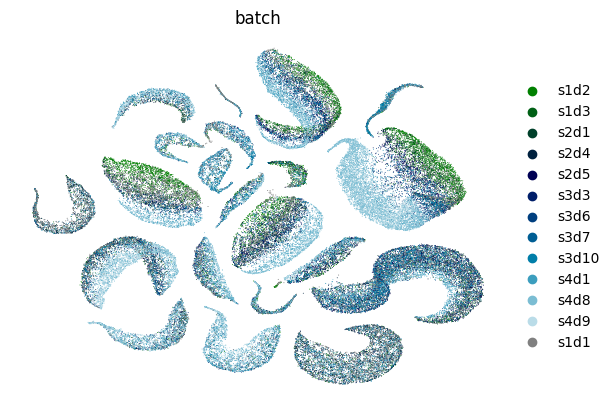

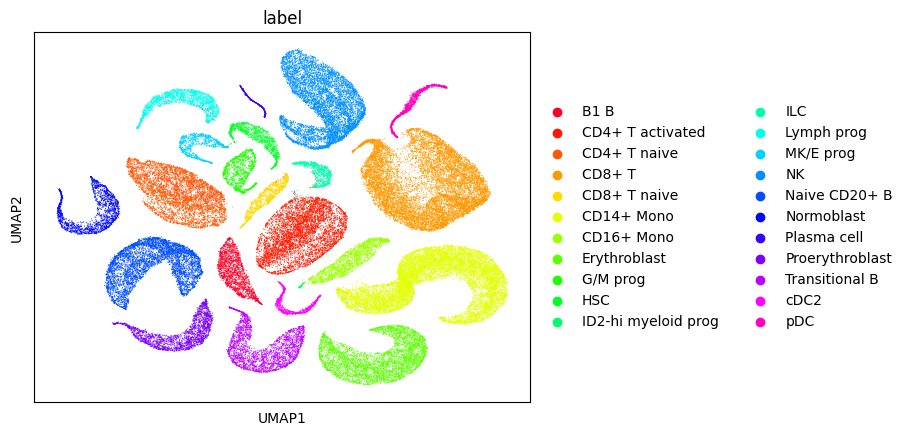

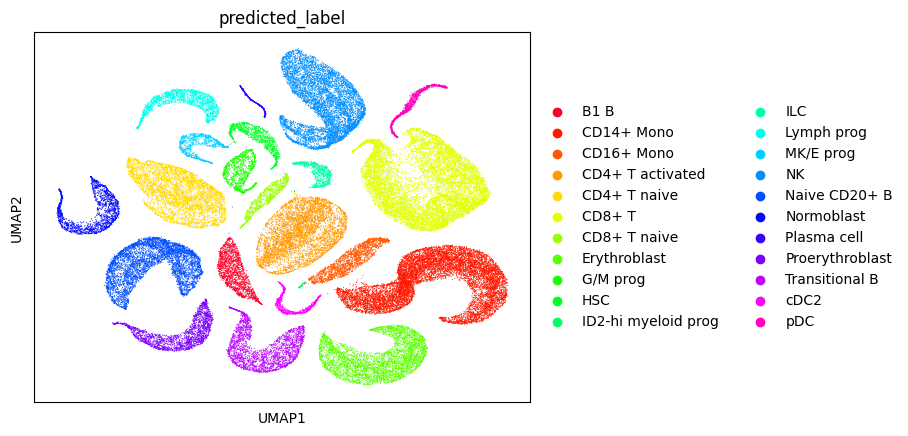

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


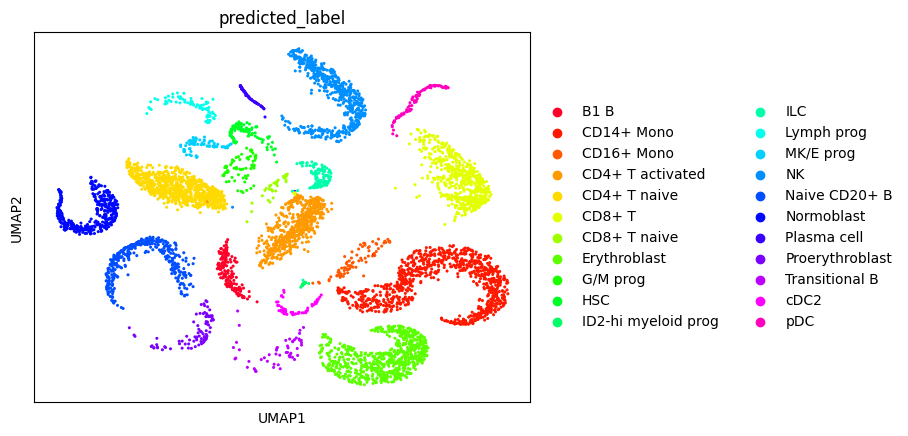

In [7]:
import scanpy as sc 
for test_batch in ['s1d1']:
    model = UnitedNet(f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
    model.load_model(f"{root_save_path}/{test_batch}/transfer_best.pt")
    adatas = [adata_atac, adata_gex]
    adata_all = model.infer(adatas)
    adata_all.obs['batch'] = list(adatas[0].obs['batch'])
    adata_all.obs['label'] = list(adatas[0].obs['label'])

    cmap_wt = plt.get_cmap('ocean')
    new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
    size_umap = 120000 / adatas[0].shape[0]

    fig,ax=plt.subplots()
    ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
    sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
               ax=ax,save=f'ATACseq_{test_batch}_batch_label.pdf')

    fig,ax=plt.subplots()
    sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
               ax=ax,save=f'ATACseq_{test_batch}_gt_label.pdf')

    fig,ax=plt.subplots()
    sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
               ax=ax,save=f'ATACseq_{test_batch}_predict_label.pdf')
    fig,ax=plt.subplots()
    sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_batch_label_test.pdf')

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


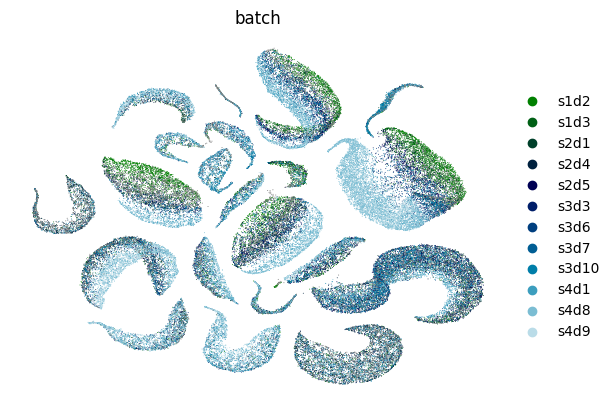

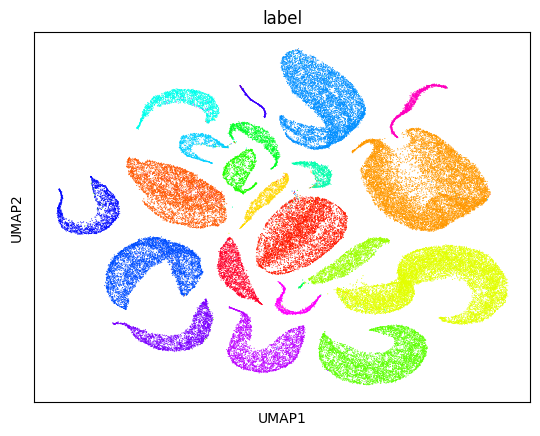

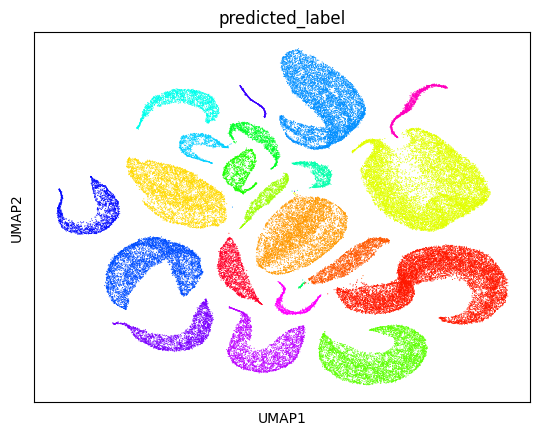

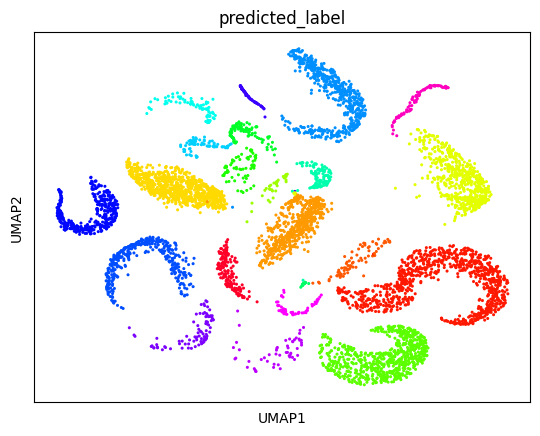

In [8]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1200
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_gt_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_predict_label.png',legend_loc =None)
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_batch_label_test.png',legend_loc =None)

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


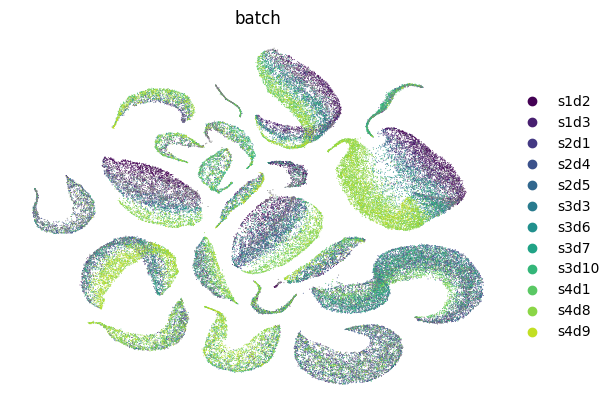

In [16]:
cmap_wt = plt.get_cmap('viridis')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label.png',legend_loc =None)


C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


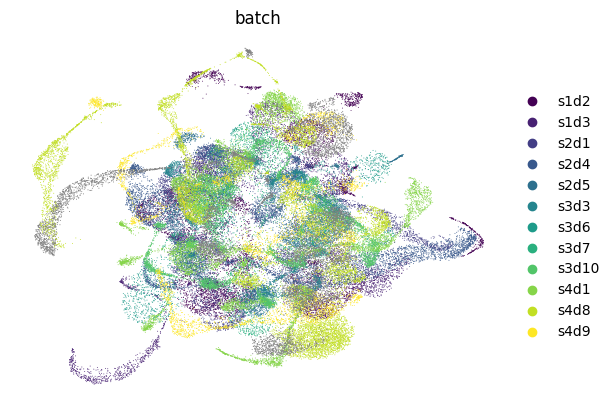

In [14]:

cmap_wt = plt.get_cmap('viridis')
new_cmap = list(cmap_wt(np.linspace(0, 1, 12)))
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_atac[adata_atac.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_atac[adata_atac.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label_atac_only.png',legend_loc =None)


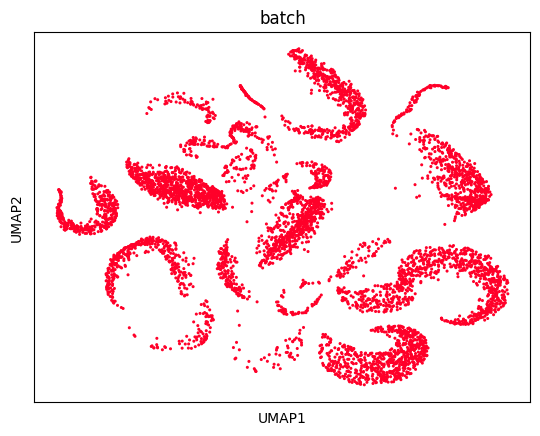

In [18]:
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_batch_label_test_colored_batch.png',legend_loc =None)

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


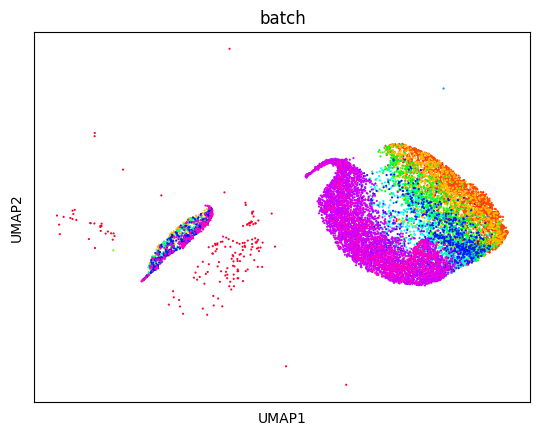

In [32]:
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['label'].isin(['CD8+ T','CD8+ T naive'])],color=['batch'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_CD8T_position.png',legend_loc =None)

In [25]:
import pandas as pd
adata_atac.var_names = np.append(pd.read_csv(f'../data/ATACseq/annotated_ATAC_gene_names_10k.csv').iloc[:,0].values,'unknown')
adata_atac.var_names_make_unique()
adata_atac.var_names = adata_atac.var_names.astype(str)

CD8_T_cells


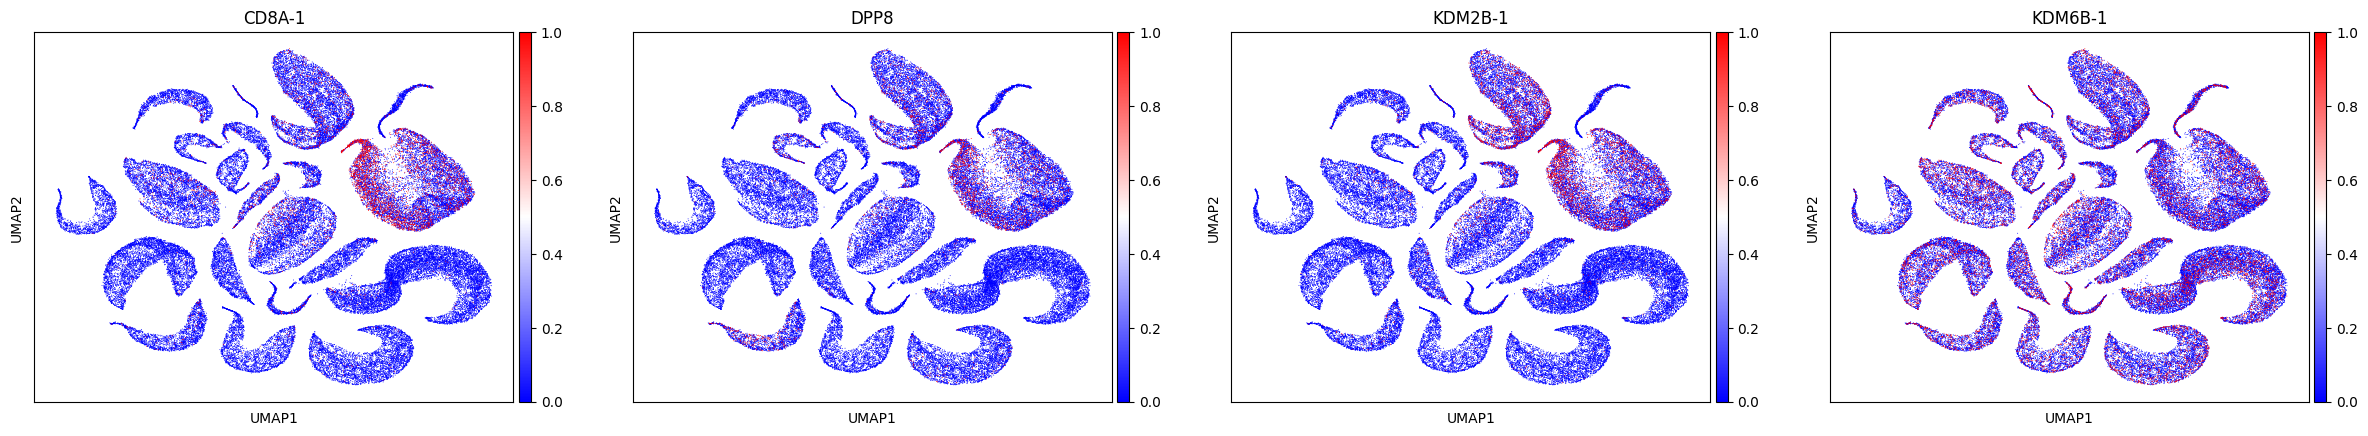

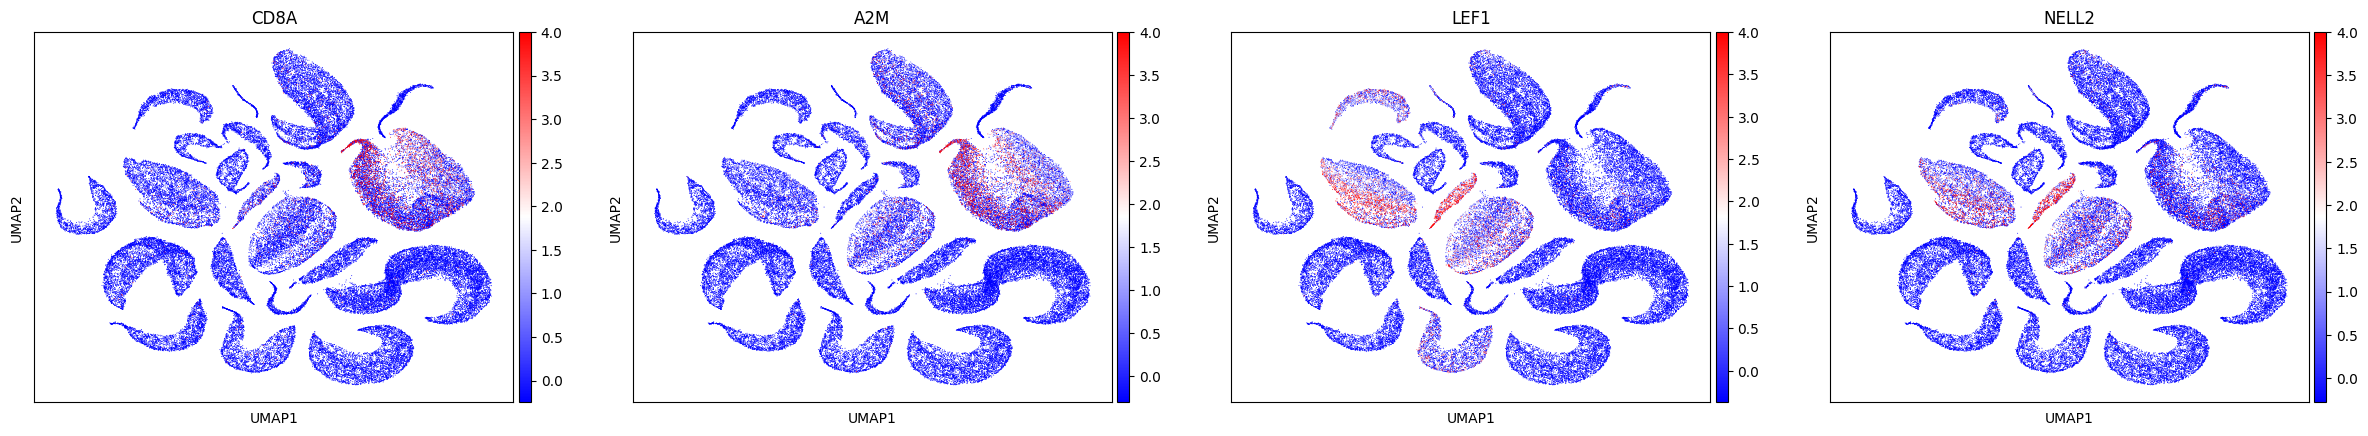

In [35]:
adatas_all_orig = [adata_atac,adata_gex]
cd8t_specific = [
    ['CD8A-1','DPP8','KDM2B-1','KDM6B-1'],
    ['CD8A','A2M','LEF1','NELL2'],
]
mods = ['ATAC','Gene']
for mjt in ['CD8_T_cells']:
    print(mjt)
    for ii in range(2):
        adata_all.obs[cd8t_specific[ii]] = adatas_all_orig[ii][:,cd8t_specific[ii]].X
        sc.pl.umap(adata_all,color=cd8t_specific[ii],cmap='bwr',show=True,save=f'{mjt}_{mods[ii]}.png')


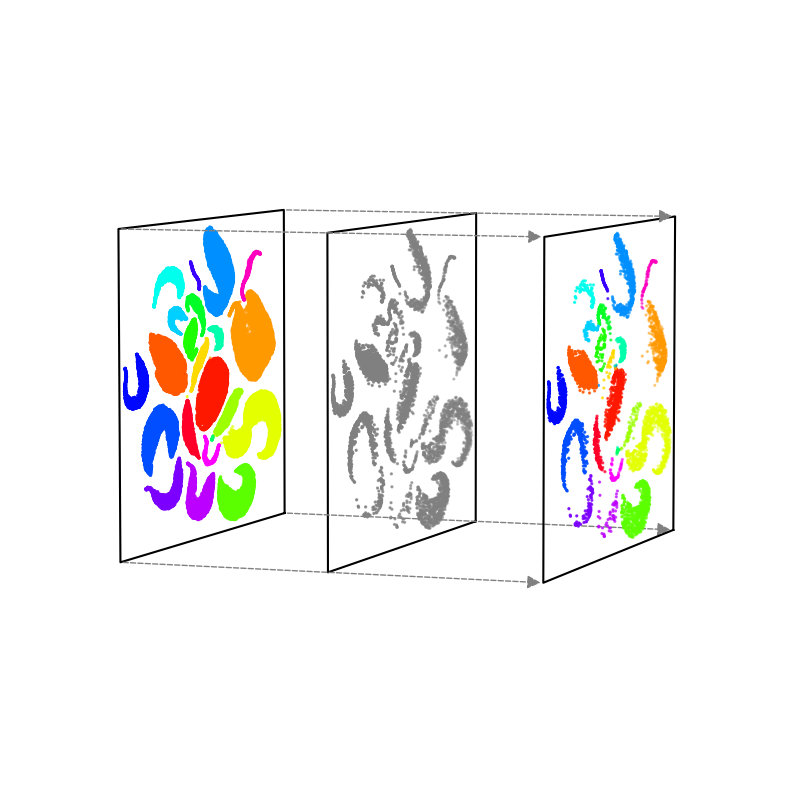

In [10]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
from matplotlib.colors import to_hex
type_cl_dict = {}
batch_name = test_batch
for x,y in zip(adata_all[adata_all.obs['batch']!=batch_name].obs['label'].astype('category').cat.categories,
               plt.get_cmap('gist_rainbow')(np.linspace(0, 1, len(adata_all.obs['label'].unique()))).tolist()):
    type_cl_dict[x] = to_hex(y)


new_cmap = adata_all[adata_all.obs['batch']!=batch_name].obs['label'].map(type_cl_dict).values
new_cmap_bct = adata_all[adata_all.obs['batch']==batch_name].obs['predicted_label'].map(type_cl_dict).values

size_umap = 120000 / adatas[0].shape[0]
                                                                                    
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection="3d")
np.random.seed(0)
ax.scatter3D(1, adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1], color=new_cmap,s=size_umap, zorder=1)
ax.scatter3D(2, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color='gray',s=size_umap, zorder=2)
ax.scatter3D(3, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color=new_cmap_bct,s=size_umap, zorder=3)
all_dots_x = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0]
all_dots_y = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1]
u_l = [all_dots_x.min()-1,all_dots_y.max()+1]
u_r = [all_dots_x.max()+1,all_dots_y.max()+1]
l_l = [all_dots_x.min()-1,all_dots_y.min()-1]
l_r = [all_dots_x.max()+1,all_dots_y.min()-1]

ax.plot3D([1,1,1,1,1],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=1)
ax.plot3D([2,2,2,2,2],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=2)
ax.plot3D([3,3,3,3,3],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=3)

ax.view_init(5, -70)
# poly = PolyCollection([[(-16,-13),(20,-13),(20,25),(-16,25)],[(-16,-13),(20,-13),(20,25),(-16,25)]], facecolors=['gray'], alpha=.5)
# ax.add_collection3d(poly, zs=[1,2], zdir='x')
# Hide grid lines
ax.grid(False)
plt.axis('off')
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# plt.xlim(-0.5,1.5)

for y,z in zip([l_r[0],l_l[0],u_l[0],u_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1]]):
  a = Arrow3D([1, 3], [y, y], 
              [z, z], mutation_scale=20, ls="dashed",
              lw=1, arrowstyle="-|>", color="grey")
  ax.add_artist(a)

plt.savefig('./figures/ATACseq_transfer_cell_type.png',dpi=800)
plt.show()